# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve:
 
A major proportion of retail bank profit comes from interests in the form of home loans. Bad loans usualy eat up a major chunk of their profits. 

Owing to the convenience of online loans, borrowing money on online platforms become increasingly popular. a machine learning model should be applied to analyze various data points and predict a borrower defaulting on a loan.

The loan approval process is multifaceted and prone to wrong judgment owing to human error and biases. 
It is crucial for the bank to be able to idendificate default risk in a effective and efficient way.

 
 

### **The objective:**

 - What is the intended goal:

Use data science to create a adapt model and use the actual data to train this model so that we can use this model to predict loan default. The model should be able to predict the loan default effectively with a sufficient performance (similar or higher than human process performance),  and at less expensive cost.

### **The key questions:**

- What are the key questions that need to be answered:
1. How is the quality of the data, is it reliable to train the model. How the data is distributed, what treatment to apply (outliers removing, data scaling ... ) before using it to train the machine.
2. What criteria (accuracy score, recall score or precision score) should be used to train the machine.
3. Which model is more adapt to make this prediction (linear regression, KNN, Decision Tree, Random Forest, a boosting model or even a neural network model ). Which algorithm should be used to tune the model with which hyperparameters. Which performance should be the target.
4. What is the cost to create, train and implement this model.


### **The problem formulation**:

- What is it that we are trying to solve using data science?
1. Create and train a machine model who can proceed complex data and predict default rick in a effective and efficient way.
2. Use the created machine model to identify the key features who are driving the default prediction.


## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV

# To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first five rows
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# Display last five rows
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data
data.shape

(5960, 13)

**Observations:**
- There are **5960** rows, 13 columns.

### **Check the data types of the columns**

In [7]:
# Check info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


**Observation**

- There are **5960 observations and 13 columns** in the dataset.
- There are **11** columns that contain null values.
- There are **11** columns of numeric data type, and **2** columns of object data type.

### **Convert the data types**

In [9]:
#convert object to categoricalvariable
cols_cat = data.select_dtypes(['object']).columns.tolist()
cols_cat.append('BAD')

for col in cols_cat:
    data[col]=data[col].astype('category')

In [10]:
#create list of numerical columns
cols_num = data.select_dtypes(['float64']).columns.tolist()
cols_num.append('LOAN')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Check for missing values**

In [12]:
# Analyse missing values - Hint: use isnull() function
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [13]:
# Check the percentage of missing values in the each column.
(data.isnull().sum()/len(data)).round(2)

BAD        0.00
LOAN       0.00
MORTDUE    0.09
VALUE      0.02
REASON     0.04
JOB        0.05
YOJ        0.09
DEROG      0.12
DELINQ     0.10
CLAGE      0.05
NINQ       0.09
CLNO       0.04
DEBTINC    0.21
dtype: float64

**Observations :**
- Several columns have a high percentage of missing value : 
  Column 'DEBTINC' has **21%**,
  Column 'DEROG' has **12%**,
  Column 'DELINQ' has **10%**.
  

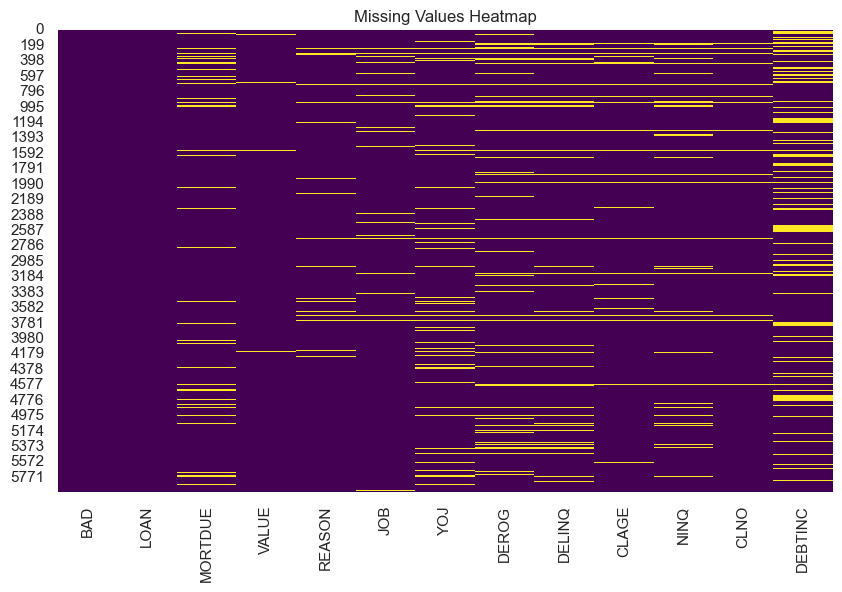

In [14]:
# Create a heatmap using seaborn to visualize the missing value
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

# Add title and show the plot
plt.title('Missing Values Heatmap')
plt.show()

In [15]:
# Checking the info again and the datatype of different variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [16]:
# Analyze the summary statistics for numerical variables
data.select_dtypes(include=['number']).describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.97,11207.48,1100.00,11100.00,16300.00,23300.00,89900.00
MORTDUE,5442.0,73760.82,44457.61,2063.00,46276.00,65019.00,91488.00,399550.00
VALUE,5848.0,101776.05,57385.78,8000.00,66075.50,89235.50,119824.25,855909.00
YOJ,5445.0,8.92,7.57,0.00,3.00,7.00,13.00,41.00
DEROG,5252.0,0.25,0.85,0.00,0.00,0.00,0.00,10.00
DELINQ,5380.0,0.45,1.13,0.00,0.00,0.00,0.00,15.00
CLAGE,5652.0,179.77,85.81,0.00,115.12,173.47,231.56,1168.23
NINQ,5450.0,1.19,1.73,0.00,0.00,1.00,2.00,17.00
CLNO,5738.0,21.30,10.14,0.00,15.00,20.00,26.00,71.00
DEBTINC,4693.0,33.78,8.60,0.52,29.14,34.82,39.00,203.31


**Observations :**


- Average loan amount is  **18,608** with a range from **1,100** to **89,900**.

- Average mortgage due is **73,001** with a range from **2,063** to **399,550**.

- Average property value is **101,540** with a range from **8,000** to **855,909**.

- Average years on the job is **8.8** years. There is also person without YOJ. The longest duration is **41** years.

- the DEROG has a range from **0** to **10**.

- the DELINQ has a range from **0** to **15**.

- Average credit line age is **179** months.

- the DEBTINC has a high range from **0.52** to **203.31** indicating that some applicants have little debt burden while some applicants have debt more than twice his income.

In [17]:
# Check summary for categorical data 
data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Observations :**
- Most of the loans are of **DebtCon** category.

**Let's look at the unique values in all the categorical variables**

In [18]:
data.select_dtypes(['category']).nunique()

BAD       2
REASON    2
JOB       6
dtype: int64

In [19]:
# Checking the count of unique values in each categorical column, using percentage to express
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts(normalize = True).round(2))
    print('*'*40)

Unique values in BAD are :
BAD
0    0.8
1    0.2
Name: proportion, dtype: float64
****************************************
Unique values in REASON are :
REASON
DebtCon    0.69
HomeImp    0.31
Name: proportion, dtype: float64
****************************************
Unique values in JOB are :
JOB
Other      0.42
ProfExe    0.22
Office     0.17
Mgr        0.14
Self       0.03
Sales      0.02
Name: proportion, dtype: float64
****************************************


**Observations :**
- **BAD : 20%** had default. **80%** didn't have default.
- **REASON : 69%** for DebtCon use, **31%** for HomeImp use.
- **JOB : 42%** were not noted, **22%** were of ProfExe profession, **17%** were of Office profession,**14%** were of Mgr profession, **3%** were of Self, **2%** were of Sales.

## **Exploratory Data Analysis (EDA) and Visualization**

### **1. Univariate Analysis - Numerical Data**
We use box plot and histogram to analyze the numerical columns.

In [20]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    boxplot=sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    # Display mean value next to the mean line
    plt.text(data[feature].mean(), 200, 
    f'Mean: {data[feature].mean():.2f}', color='black', verticalalignment='bottom', horizontalalignment='left')
    # Display mean value next to the median line
    plt.text(data[feature].median(), 300, 
    f'Median: {data[feature].median():.2f}', color='black', verticalalignment='bottom', horizontalalignment='left')
    
    # Calculate quartiles
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    
    IQR=Q3-Q1 # IQR Range
    Lower_Whisker =Q1-1.5*IQR  #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    
    # Add Q1, Q3, and median lines
    plt.axvline(Q1, color='red', linestyle='dashed', linewidth=2, label='Q1')
    plt.axvline(Q3, color='blue', linestyle='dashed', linewidth=2, label='Q3')

    # Display Q1, Q3, and median values
    plt.text(Q1, 1, f'Q1: {Q1:.2f}', color='black', verticalalignment='bottom', horizontalalignment='right')
    plt.text(Q3, 1, f'Q3: {Q3:.2f}', color='black', verticalalignment='bottom', horizontalalignment='left')
    
    # Display Max and Min
    plt.text(data[feature].min(), 100, f'Min: {data[feature].min():.2f}', color='black', verticalalignment='bottom', horizontalalignment='right')
    plt.text(data[feature].max(), 100, f'Max: {data[feature].max():.2f}', color='black', verticalalignment='bottom', horizontalalignment='left')
    
    # Display Max and Min
    #plt.text(Lower_Whisker, 80, f'Lower_W: {Lower_Whisker:.2f}', color='black', verticalalignment='bottom', horizontalalignment='right')
    plt.text(Upper_Whisker, 60, f'Upper_W: {Upper_Whisker:.2f}', color='black', verticalalignment='bottom', horizontalalignment='left')

#### Analyze the Histogram and Boxplot for LOAN

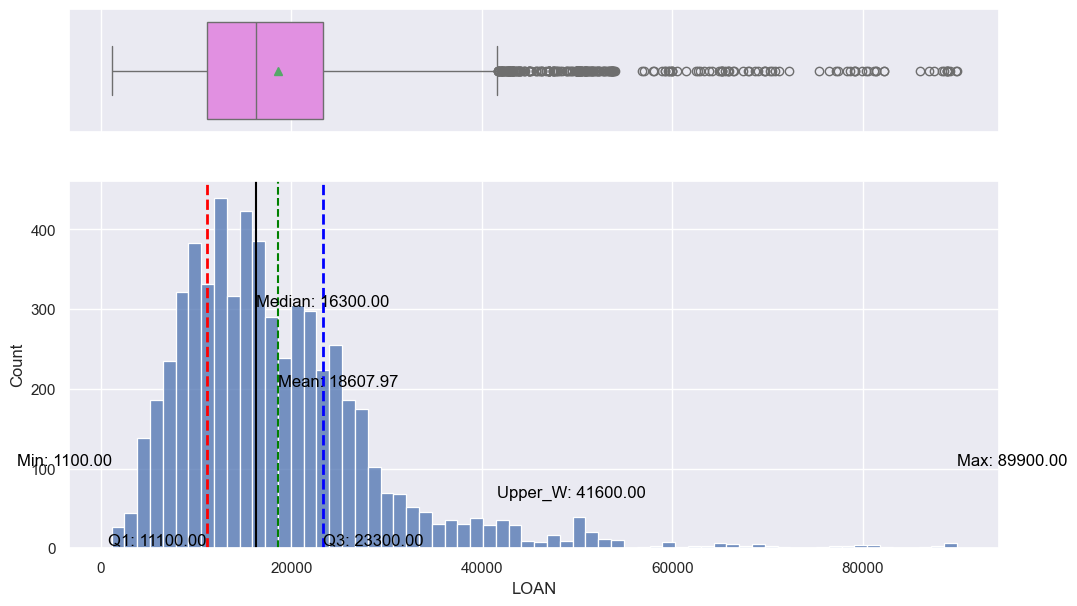

In [21]:
# Build the histogram boxplot for Loan
histogram_boxplot(data, 'LOAN')

In [22]:
#Get the proportion of the total amount beside the Upper_Whisker
data.loc[data['LOAN']>41600]['LOAN'].sum()/data['LOAN'].sum()

0.12590946182942828

In [23]:
#Count the applicants who are beside the Upper_Whisker
data.loc[data['LOAN']>41600]['LOAN'].count()

256

In [24]:
# max and min value propotion
data['LOAN'].max()/data['LOAN'].min()

81.72727272727273

**Observations :**

- The loan value is right-skewed and has a high range  from **1100** to **89900**, the max is almost **82** times of the min, indicating a huge difference in terms of value among the loans. There are **256**  applicants who have a loan higher than the Upper_Whisker **41600** and the total of this kind of loan represent **12.6%** of the total amount of all the loans.

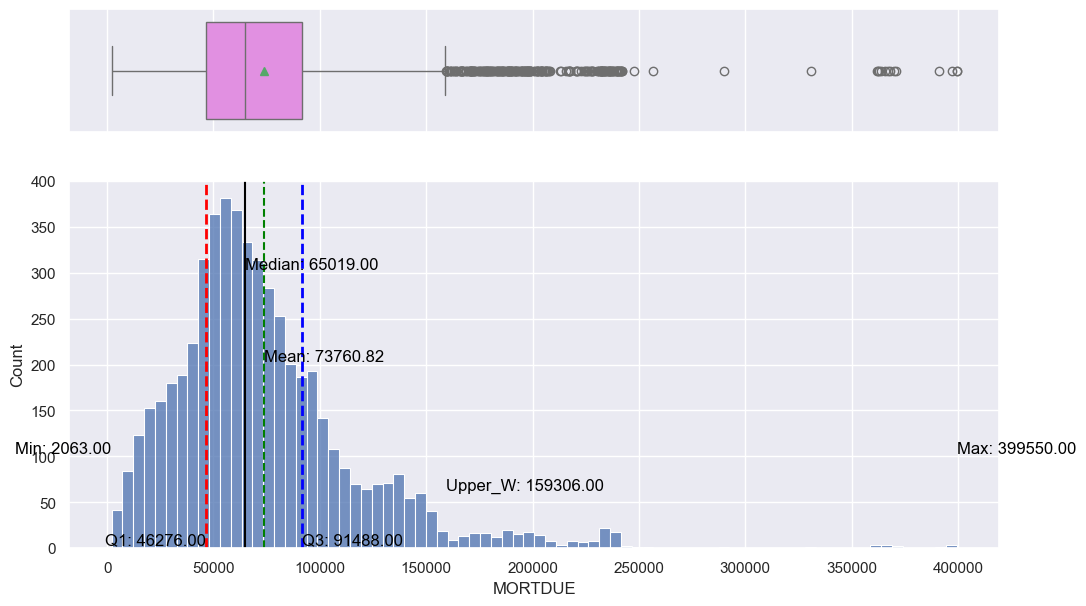

In [25]:
# Build the histogram boxplot for mortdue
histogram_boxplot(data,'MORTDUE')

In [26]:
#Get the propotion of the total amount beside the Upper_Whisker
data.loc[data['MORTDUE']>159306]['MORTDUE'].sum()/data['MORTDUE'].sum()

0.12262209327505653

In [27]:
#Count the applicants who are beside the Upper_Whisker
data.loc[data['MORTDUE']>159306]['MORTDUE'].count()

234

In [28]:
# max and min value propotion
data['MORTDUE'].max()/data['MORTDUE'].min()

193.67426078526418

**Observations :**

- The mortdue is right-skewed and has a high range from **2063** to **399550**, the max is almost **194** times of the min. It also has a notable peak around the median **65019.00**. The mean is **73760.82**. There are **234**  applicants who have a mortdue higher than the Upper_Whisker **159306** and the total of this kind of mortdue represent **12.3%** of the total amount of the mortdue.

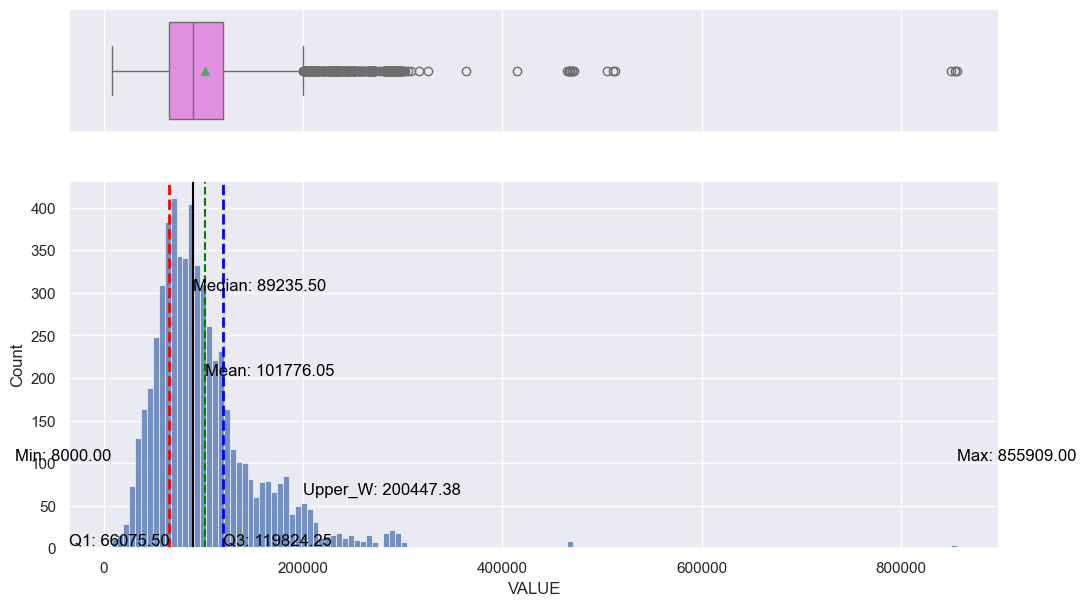

In [29]:
# Build the histogram boxplot for value
histogram_boxplot(data,'VALUE')

In [30]:
##Get the propotion of the total amount beside the Upper_Whisker
data.loc[data['VALUE']>200447]['VALUE'].sum()/data['VALUE'].sum()

0.13958474411813587

In [31]:
##Count the applicants who are beside the Upper_Whisker
data.loc[data['VALUE']>200447]['VALUE'].count()

320

In [32]:
## max and min value propotion
data['VALUE'].max()/data['VALUE'].min()

106.988625

**Observations :**

- The property value is right-skewed and has a high range from **8000** to **855909**, the max is almost **107** times of the min. The mean is **101776**. There are **320**  applicants who have a property value higher than the Upper_Whisker **200447** and the total of this kind of property value represent **14%** of the total amount of the value.

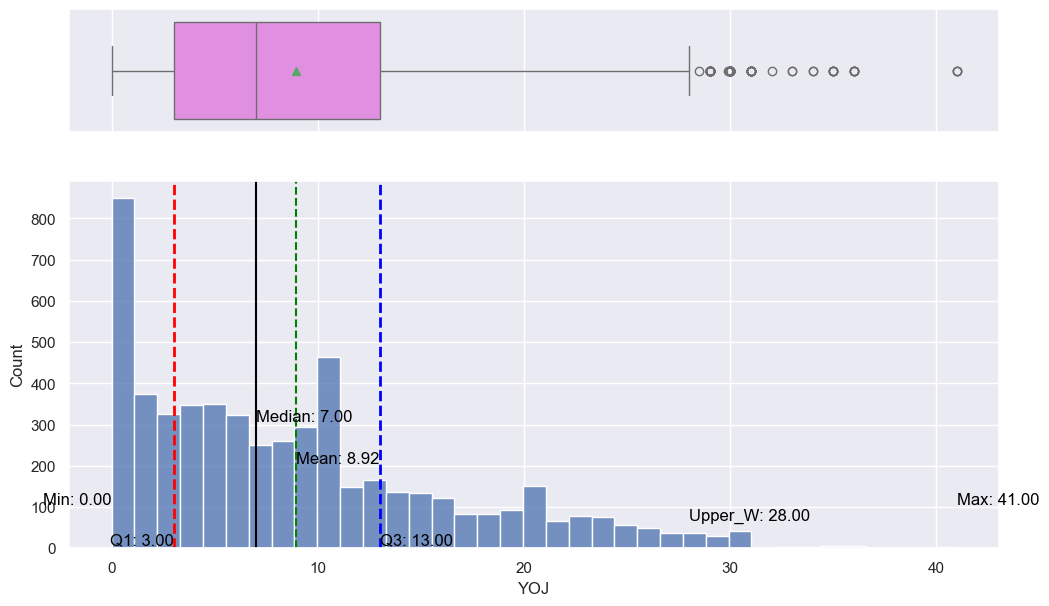

In [33]:
# Build the histogram boxplot for yoj
histogram_boxplot(data,'YOJ')

In [34]:
##Count the applicants who are beside the Upper_Whisker
data.loc[data['YOJ']>28]['YOJ'].count()

91

**Observations :**

- The YOJ is right-skewed with a range from **0** to **41**. There is a descent tendance.  The mean is **8.9**. The median is **7**. There are **91** applicants who have a YOJ higher than the Upper_Whisker **28**.

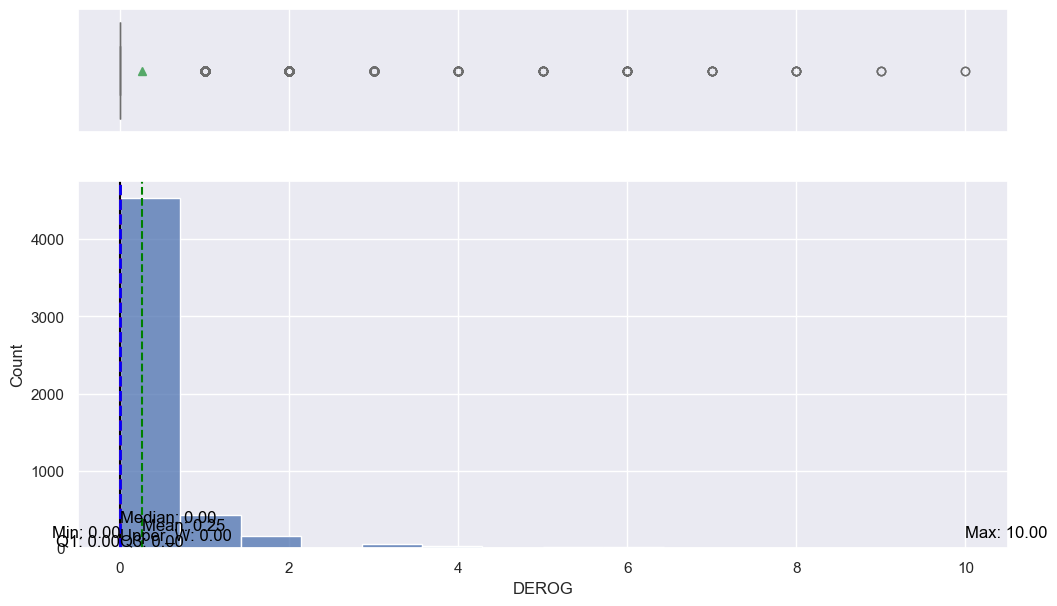

In [35]:
# Build the histogram boxplot for derog
histogram_boxplot(data,'DEROG')

In [36]:
data.loc[data['DEROG']>0]['DEROG'].count()

725

In [37]:
data.loc[data['DEROG']>0]['DEROG'].count()/data['DEROG'].count()

0.13804265041888805

**Observations :**

- The majority of the applicants pay in time their loans. There are totally **725** which is **13.8%** of the applicants have DEROG report. Some applicants have up to **10** DEROG marks.

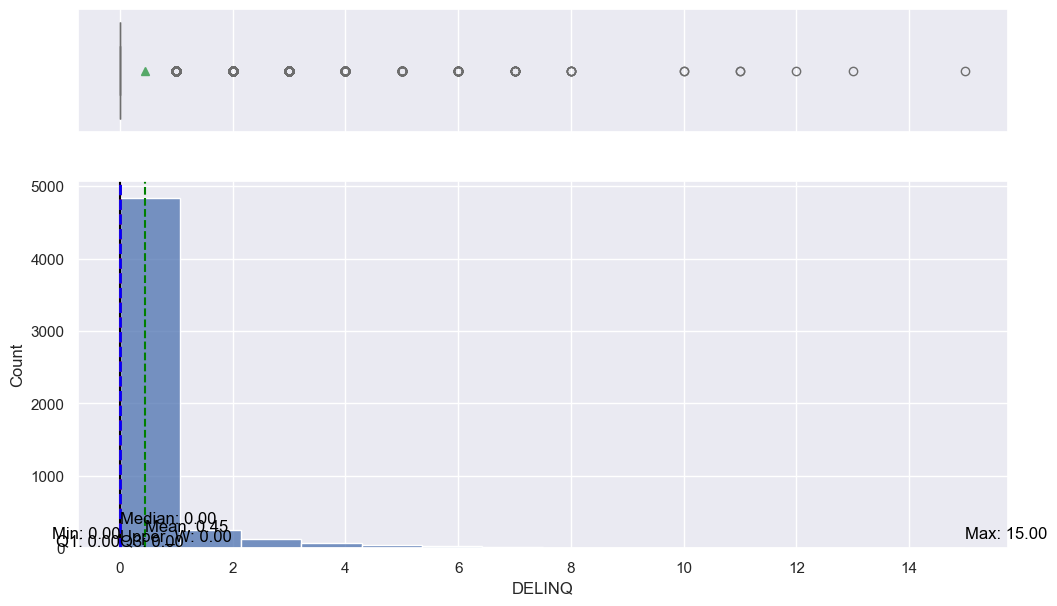

In [38]:
# Build the histogram boxplot for delinq
histogram_boxplot(data,'DELINQ')

In [39]:
data.loc[data['DELINQ']>0]['DELINQ'].count()

1201

In [40]:
data.loc[data['DELINQ']>0]['DELINQ'].count()/data['DELINQ'].count()

0.22323420074349443

**Observations :**

- The majority of the applicants pay in time their credit. There are totally **1201** applicants which is **20%** who have DELINQ mark. Some applicants have up to **15** DELINQ marks.

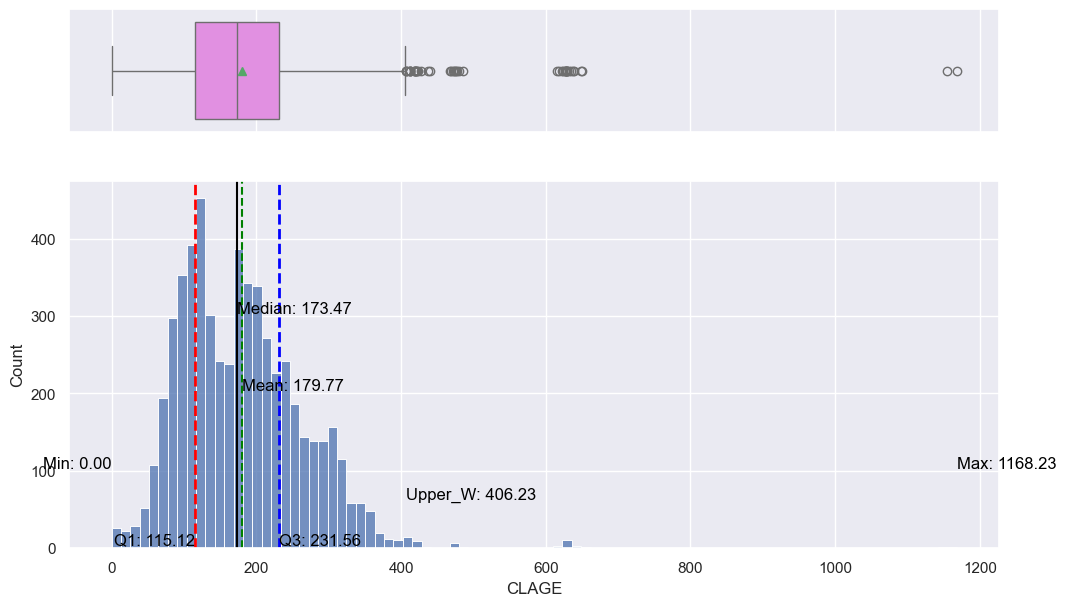

In [41]:
# Build the histogram boxplot for clage
histogram_boxplot(data,'CLAGE')

In [42]:
#Count the applicants who are beside the Upper_Whisker
data.loc[data['CLAGE']>406.23]['CLAGE'].count()

47

**Observations :**

- The clage is right-skewed and has a very high range from **0** to **1168.23**, there are some outliers to the right. The mean is **179.77**, the median is **173.47**. There are **47** applicants who have clage higher than the Upper_Whisker **406.23**. 

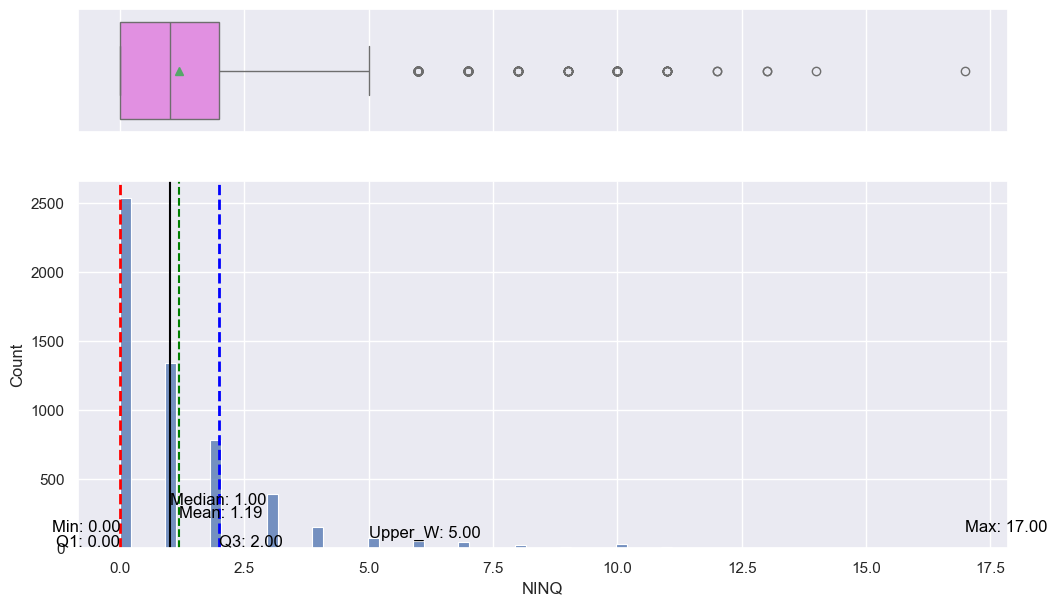

In [43]:
# Build the histogram boxplot for ninq
histogram_boxplot(data,'NINQ')

In [44]:
#How many NINQ in total?
data.loc[data['NINQ']>0]['NINQ'].count()

2919

**Observations :**

- **2919** of the applicants have **at least 1 NINQ**. The majority have less than 5 marks while some applicants have up to **17** marks.

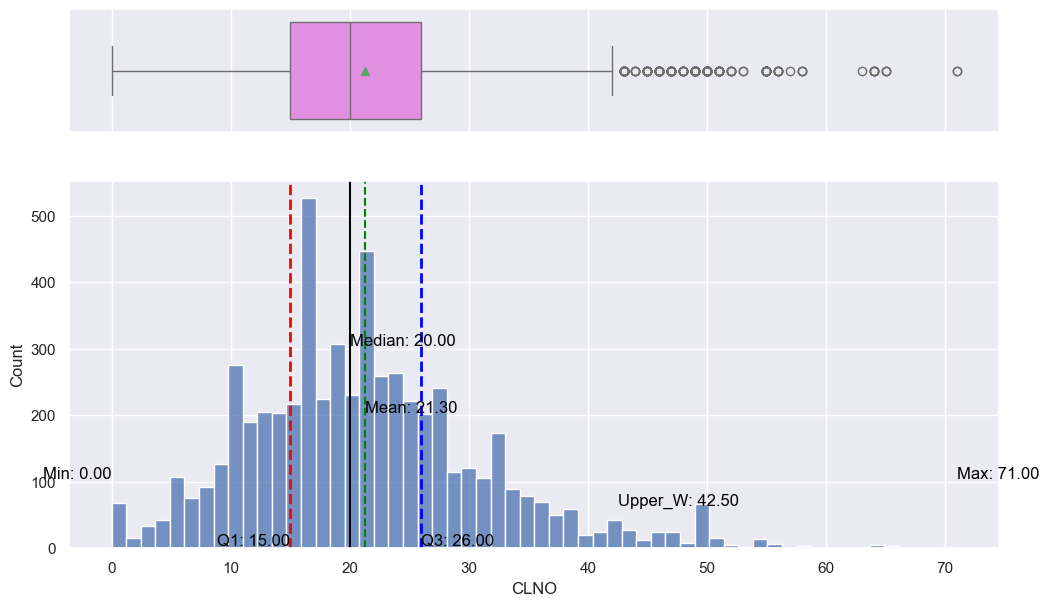

In [45]:
# Build the histogram boxplot for clno
histogram_boxplot(data,'CLNO')

In [46]:
data[data['CLNO']>42.5]['CLNO'].count()

219

**Observations :**

- The clno is right-skewed, Some applicants have un extremly high value of CLNO as **71**. There are **219** applicants with CLNO **higher than Upper_whisker 42.5.** 

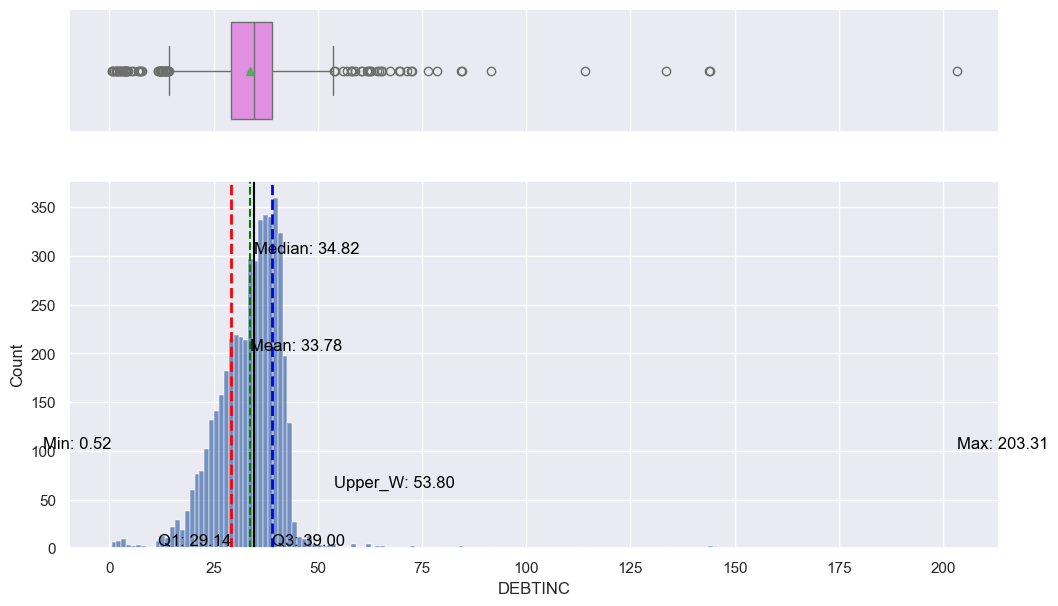

In [47]:
# Build the histogram boxplot for debtinc
histogram_boxplot(data,'DEBTINC')

In [48]:
data[data['DEBTINC']>53.8]['DEBTINC'].count()

35

In [49]:
data.loc[((data['DEBTINC']>53.8)) & (data['BAD']==1) ]['BAD'].count()

35

**Observations :**

- The debtinc is right-skewed with a range from **0.52 to 203.31.**  There are **35** applicants with debtinc higher than the Upper_Whisker **53.8**. The mean is **33.78**, the median is **34.82**.

- There are applicants who had huge debt burden, his debt was more than **twice higher** than his income.

### **2. Univariate Analysis - Categorical Data**

In [50]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### Analyze Barplot for DELINQ

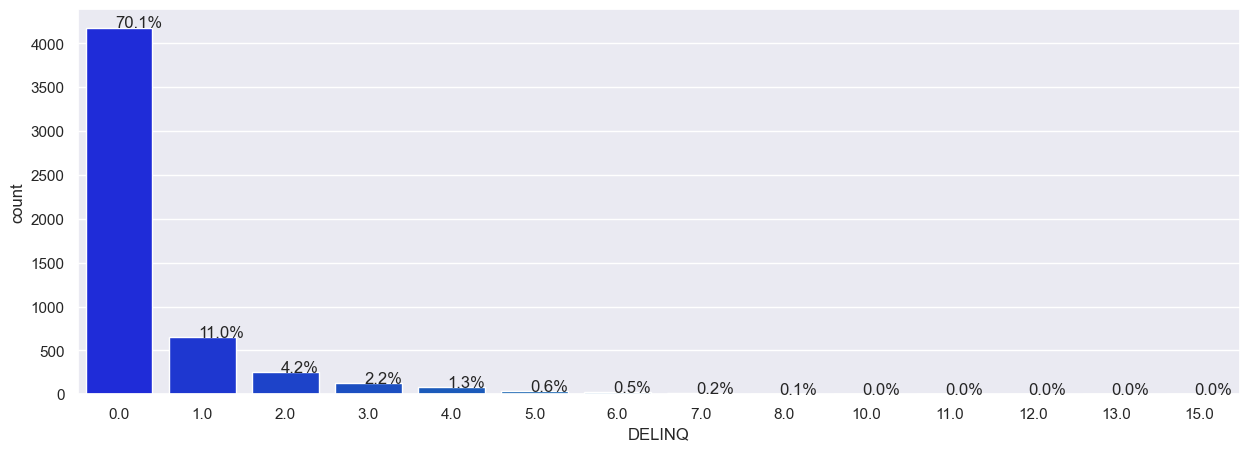

In [51]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Observations :**
- **30.9%** of the applicants had DELINQ marks. **11%** have 1 DELINQ. The rest had more than 1.

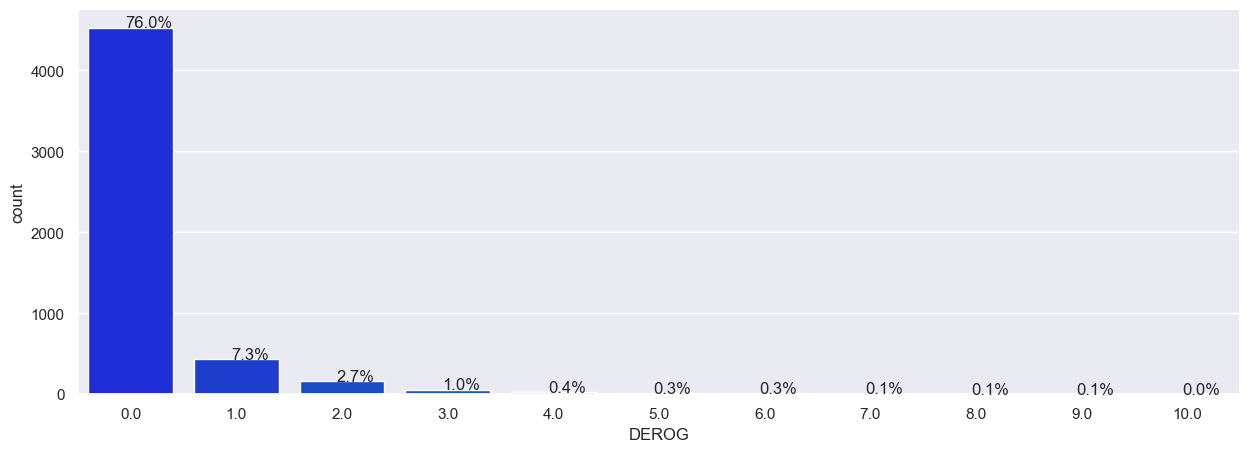

In [52]:
#Build barplot for DEROG

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

**Observations :**
- **24%** of the applicants had DEROG mark. **7.3%** had 1 DEROG mark. The rest had more than 1.

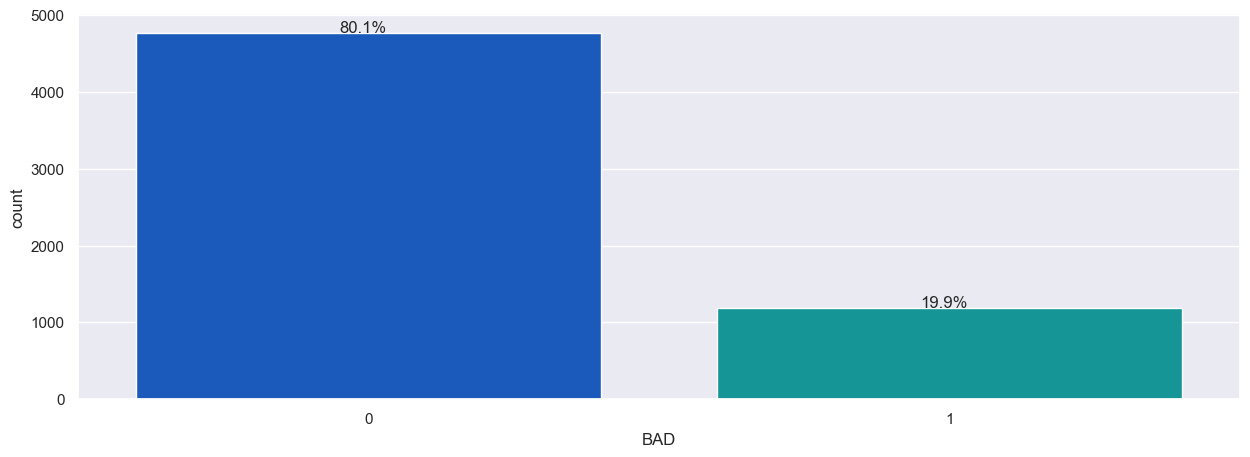

In [53]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["BAD"],palette='winter')
perc_on_bar(ax,data["BAD"])


**Observations :**

- **19.9%** of loans had default .

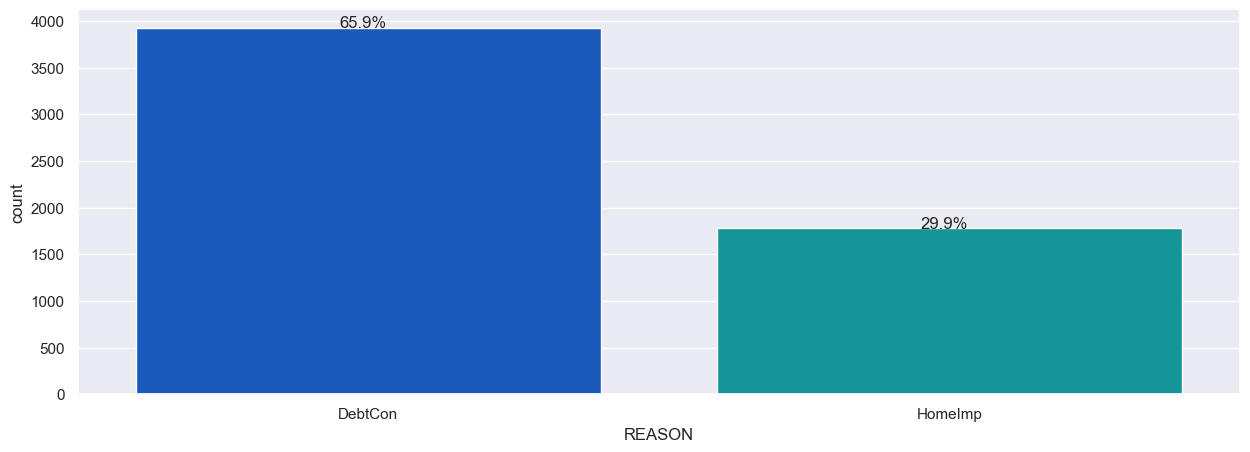

In [54]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["REASON"],palette='winter')
perc_on_bar(ax,data["REASON"])

**Observations :**

- **65.9%** were of type DebtCon. **29.9%** were of type Homelmp. The others were missing value.

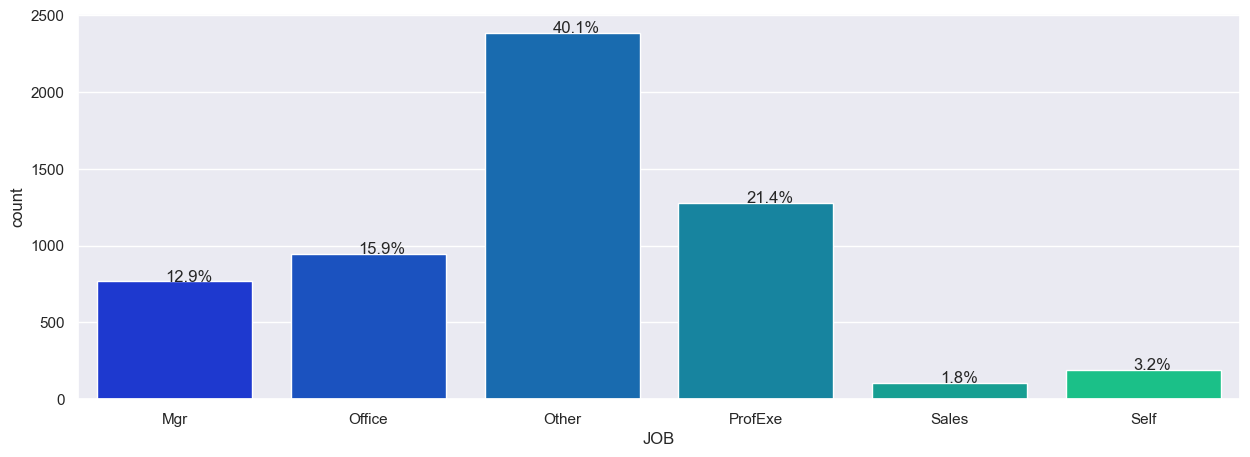

In [55]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["JOB"],palette='winter')
perc_on_bar(ax,data["JOB"])

**Observations:**

- **40.1%** of the applicants hadn't information about their job. ProfExe represented 21.4%, Office represented 15.9%, Mgr represented 12.9%, Self and Sales together represented 5%.

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<Axes: xlabel='BAD', ylabel='LOAN'>

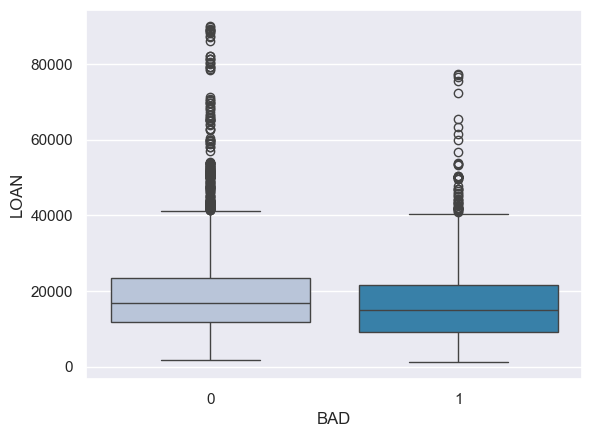

In [56]:
sns.boxplot(x=data["BAD"],y=data['LOAN'],palette="PuBu")

**Observations :**

- The loan value is similar between loans having default and loans without default.

<Axes: xlabel='JOB', ylabel='DEBTINC'>

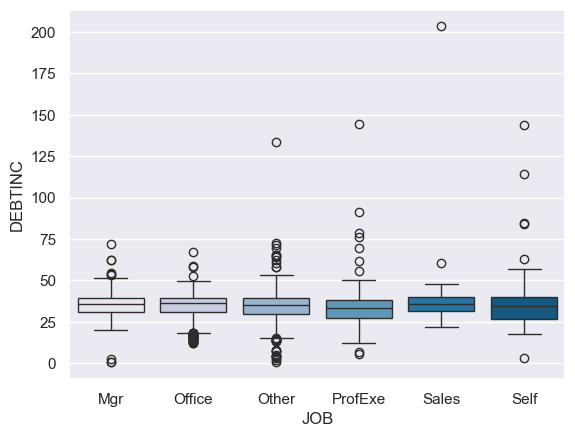

In [57]:
sns.boxplot(x=data["JOB"],y=data['DEBTINC'],palette="PuBu")

**Observations :**

- Whatever the job is, the mean of the DEBTINC seems stable in general. the jobs like Mgr and Office are more stable while the jobs like Sales and Self have more variation in terms of DEBTINC.

### **Bivariate Analysis:  Categorical vs Categorical Variables**

In [58]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    
    # Adding custom legend labels
    legend_labels = ['Good', 'Bad']
    
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for BAD and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


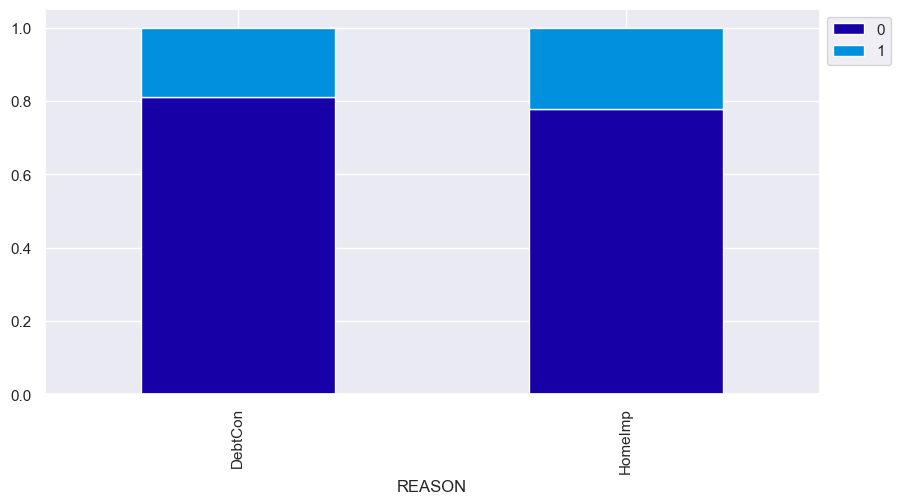

In [59]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Observations :**
- There were **2** kinds of loan : **DebtCon** and **Homelmp**, each kind had about **20%** of default. 

#### Plot stacked bar plot for for BAD and JOB

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


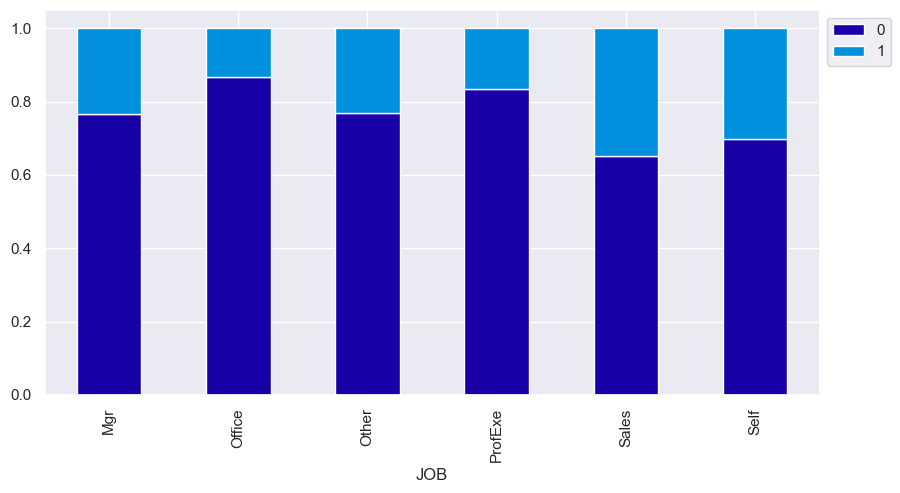

In [60]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['JOB'])

In [61]:
#proportion of default among the appliants with Sales as profession
data.loc[(data['JOB']=='Sales') & (data['BAD']==1)]['BAD'].count()/data.loc[(data['JOB']=='Sales') ]['BAD'].count()

0.3486238532110092

**Observations :**

- There were **6** kinds of jobs, **Office** and **ProfExe** had lower percentage of default: **less than 20%**, **Mgr** and **Others** had **about 20%** default, **Sales** and **Self** had higher percentage of default: **more than 30%**.

**Let's breakdown the BAD also by some numerical features**

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


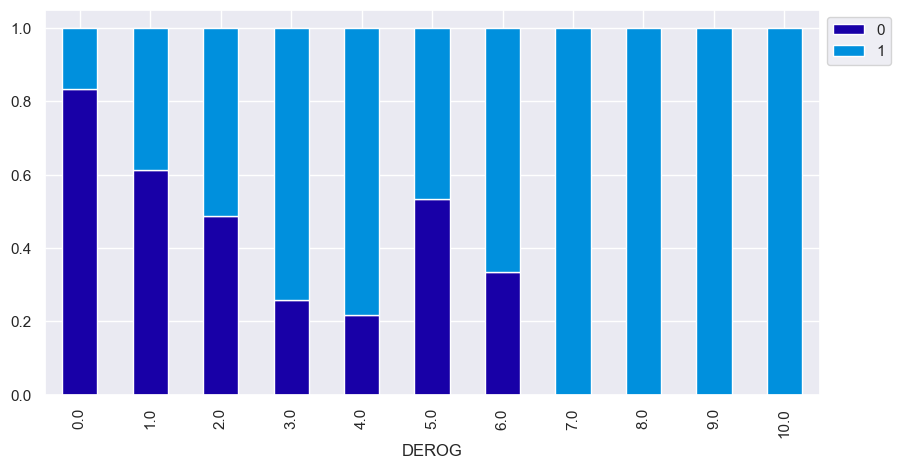

In [62]:
# Plot stacked bar plot for BAD and DEROG
stacked_plot(data['DEROG'])

**Observations :**
- Generally, the higher the DEROG value was, the higher the percentage of default.
- The applicants with **DEROG equal or higher than 7 had default**.

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


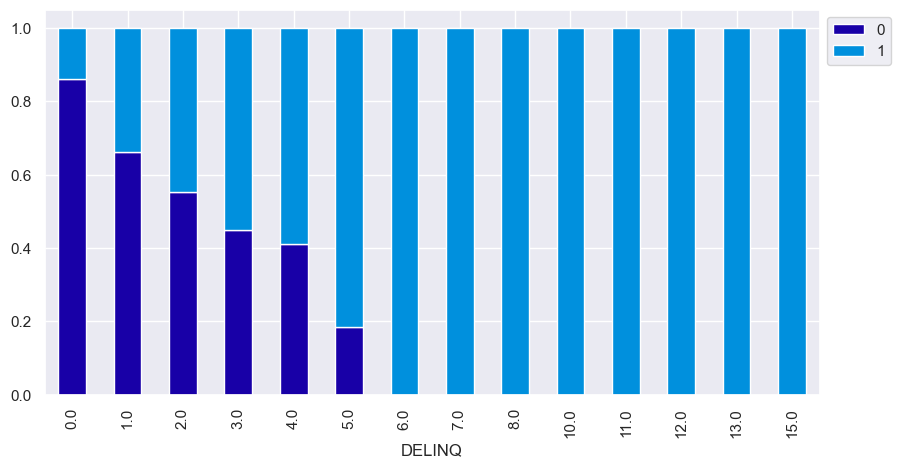

In [63]:
# Plot stacked bar plot for BAD and DELINQ
stacked_plot(data['DELINQ'])

**Observations :**

- Generally, the higher the DELINQ value was, the higher the percentage of bad loan.

- The applicants with **DELINQ equal or higher than 6 had default**.

BAD      0     1   All
CLNO                  
0.0     37    25    62
1.0      1     5     6
2.0      0    15    15
3.0     21    13    34
4.0     31    11    42
...    ...   ...   ...
63.0     0     1     1
64.0     0     5     5
65.0     0     3     3
71.0     0     2     2
All   4602  1136  5738

[63 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


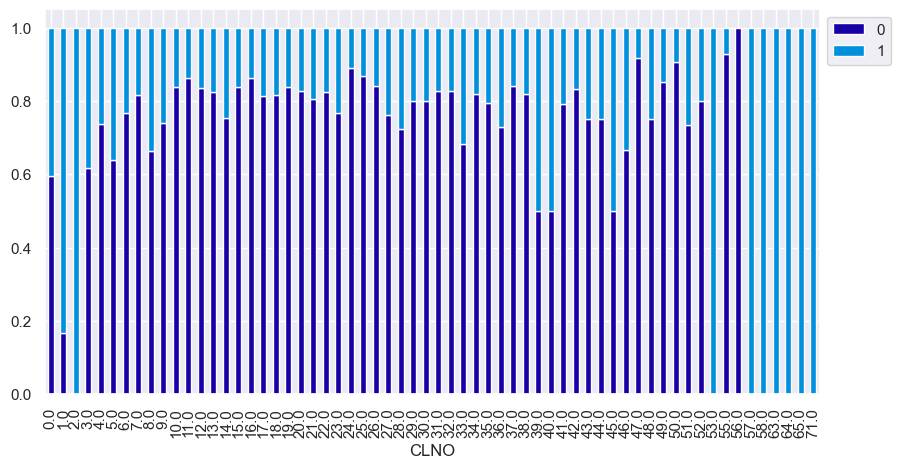

In [64]:
# Plot stacked bar plot for BAD and CLNO
stacked_plot(data['CLNO'])

**Observations :**


- The applicants with **CLNO equal or higher than 57 had default**.

BAD      0     1   All
NINQ                  
0.0   2135   396  2531
1.0   1085   254  1339
2.0    599   181   780
3.0    285   107   392
4.0     95    61   156
5.0     39    36    75
6.0     27    29    56
7.0     29    15    44
8.0     11    11    22
9.0      5     6    11
10.0    19     9    28
11.0     7     3    10
12.0     0     2     2
13.0     0     2     2
14.0     0     1     1
17.0     0     1     1
All   4336  1114  5450
------------------------------------------------------------------------------------------------------------------------


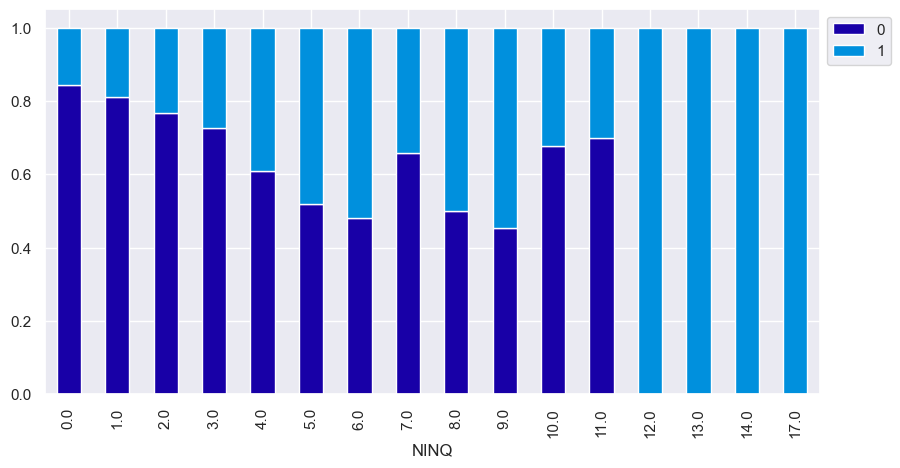

In [65]:
# Plot stacked bar plot for BAD and NINQ
stacked_plot(data['NINQ'])

**Observations :**

- The applicants with **NINQ equal or higher than 12 had default**.

BAD      0   1  All
DEBTINC            
45.01    1   0    1
45.11    1   0    1
45.2     0   1    1
45.26    0   1    1
45.3     0   1    1
...     ..  ..  ...
133.53   0   1    1
143.95   0   1    1
144.19   0   1    1
203.31   0   1    1
All      5  79   84

[83 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


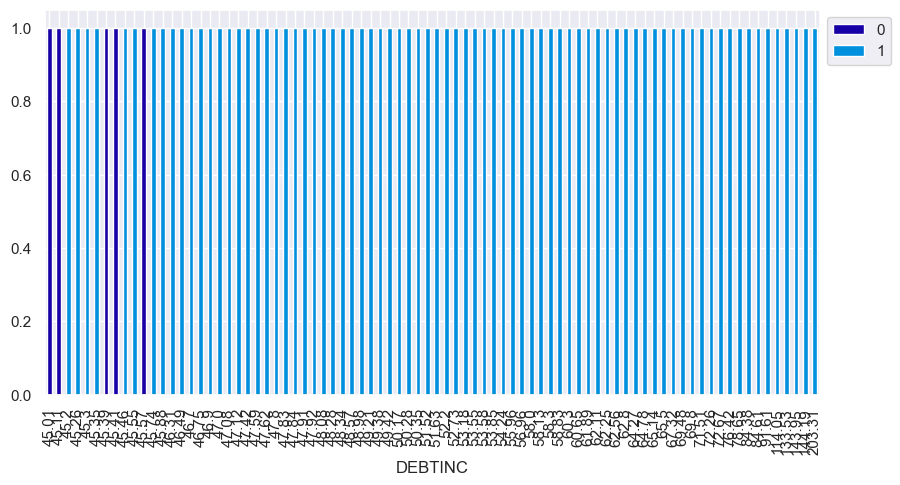

In [66]:
# Plot stacked bar plot for BAD and DEBTINC
stacked_plot(data.loc[data['DEBTINC']>45]['DEBTINC'].round(2))

**Observations :**

- It confirms that the applicants with **DEBTINC equal or higher than 46 had default**.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

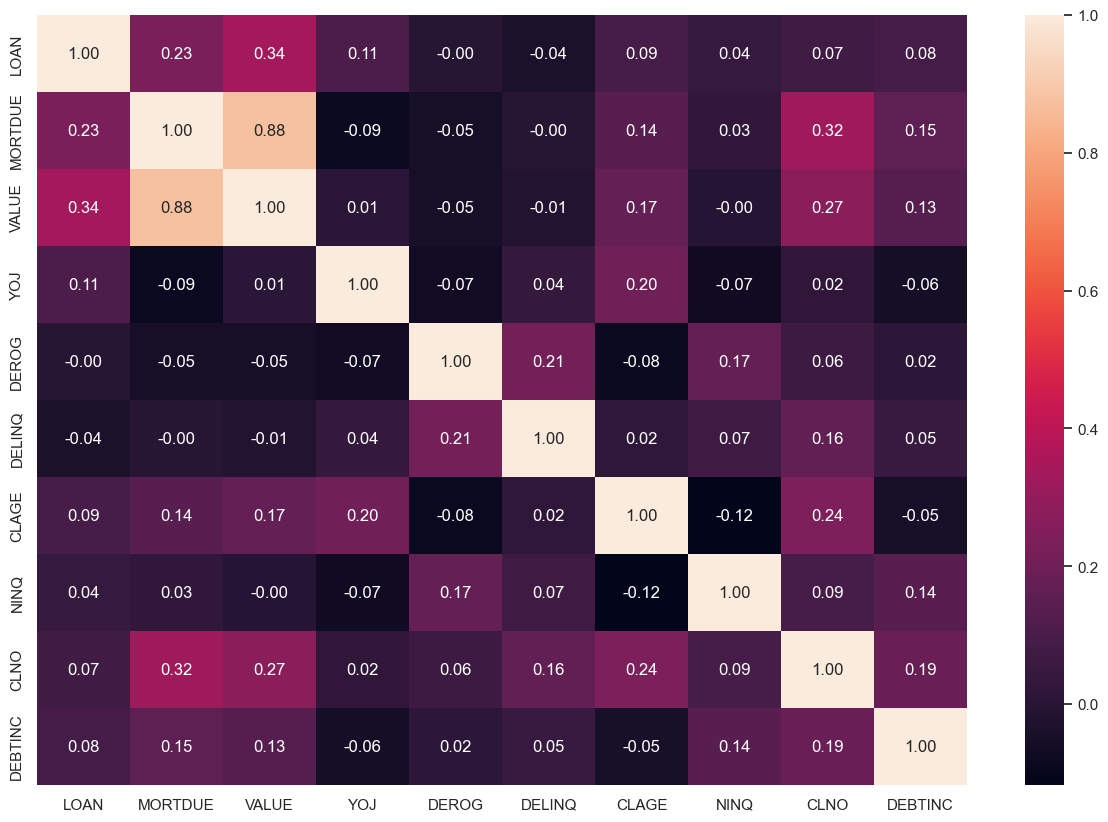

In [67]:
col_numeric=data.select_dtypes(include=np.number)
plt.figure(figsize = (15, 10))

sns.heatmap(col_numeric.corr(), annot = True, fmt = '0.2f')

plt.show()

**Observations :**

- There are some natural correlations like between VALUE and  MORTDUE or like betweeen VALUE and LOAN.

## **Important Observation from EDA**

- There is important quantity of missing value. Among the **13** columns, **11** columns have missing value. The missing value should be filled before the construction of models.

- All the features are **right skewed** with a high range. A data scaling is necessary before construct linear models.

- **20%** had default. There were **2** kinds of loan : **DebtCon** and **Homelmp**, each kind had about **20%** of default. There were **6** kinds of jobs among the applicants, **Office** and **ProfExe** had lower percentage of default: **less than 20%**, **Mgr** and **Others** had **about 20%** default, **Sales** and **Self** had higher percentage of default: **more than 30%**.

- Generally, the higher the DEROG value is, the higher the percentage of default.  higher the DELINQ value is, the higher the percentage of default. The applicants with **DELINQ equal or higher than 6 had default**. The applicants with **CLNO equal or higher than 57 had default**. The applicants with **NINQ equal or higher than 12 had default**. The loans of applicants with **DEBTINC equal or higher than 46 had default**. Seems that these features can be the drivers to loan default.


#### Treating Outliers

In [68]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75) # 75th quantile
    IQR=Q3-Q1 # IQR Range
    Lower_Whisker =Q1-1.5*IQR  #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [69]:
data_without_outlier = treat_outliers_all(data,cols_num)

#### **Missing value Treatment**

In [70]:
#For numerical columns, replace the missing value by median
for column_num in cols_num:
    if data[column_num].isnull().any():
        # find the median of the column excluding null values
        column_median = data[column_num].median()
        print(data[column_num].median())
        # Replace null values with the column median
        data[column_num].fillna(column_median, inplace=True)

65019.0
89235.5
7.0
0.0
0.0
173.46666667
1.0
20.0
34.818261819


In [71]:
# the list of catigorical columns cols_cat, has already been created. For catigorical columns, replace the missing value by mode
for column_cat in cols_cat:
    if data[column_cat].isnull().any():
        # find the median of the column excluding null values
        column_mode = data[column_cat].mode()[0]

        # Replace null values with the column mode
        data[column_cat].fillna(column_mode, inplace=True)

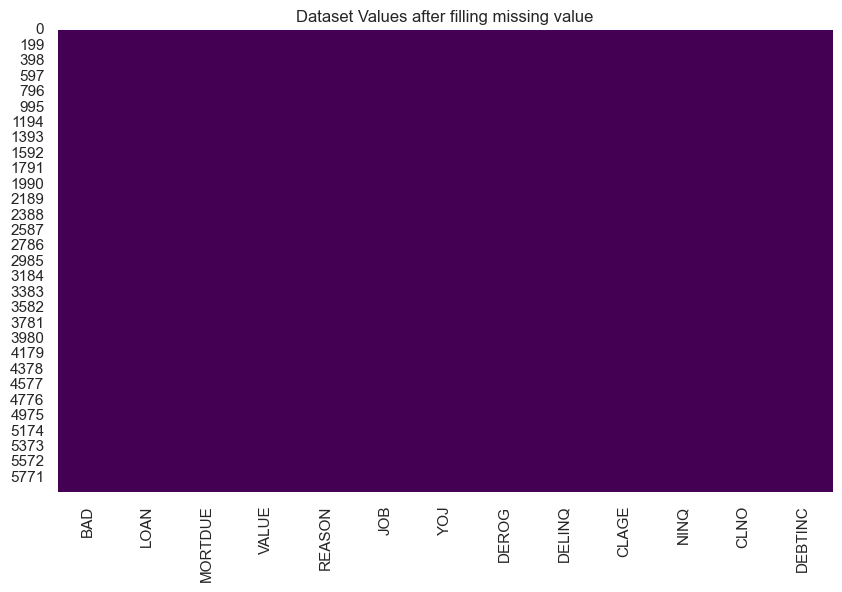

In [72]:
# Create a heatmap using seaborn to verify if the missing values have been filled
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

# Add title and show the plot
plt.title('Dataset Values after filling missing value')
plt.show()

In [73]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18051.895973,9252.565294,1100.000000,11100.000000,16300.000000,23300.000000,41600.000000
MORTDUE,5960.0,70997.067819,35597.710401,2063.000000,48139.000000,65019.000000,88200.250000,159306.000000
VALUE,5960.0,98363.244470,44663.105774,8000.000000,66489.500000,89235.500000,119004.750000,200447.375000
YOJ,5960.0,8.711300,7.122031,0.000000,3.000000,7.000000,12.000000,28.000000
DEROG,5960.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DELINQ,5960.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CLAGE,5960.0,178.368680,78.395960,0.000000,117.371430,173.466667,227.143058,406.230642
NINQ,5960.0,1.085403,1.312898,0.000000,0.000000,1.000000,2.000000,5.000000
CLNO,5960.0,20.994379,9.245170,0.000000,15.000000,20.000000,26.000000,42.500000
DEBTINC,5960.0,33.923529,6.348461,14.345367,30.763159,34.818262,37.949892,53.797805


## **Building Classification Models**

### Model evaluation criterion

### Which case is more important : 

* If we predict that a loan will not have default and the loan would have default (the case of lower recall score) then the bank will lose profit. 

* If we predict that a loan will have default and the loan doesn't get default  (the case of lower precision score) then the bank might lose client.

**Losing Profit is a greater loss.**

### How to reduce the losses?

**Bank would want `Recall` to be maximized, greater the Recall score higher are the chances of minimizing False Negative, more the bank is protected from default.**

## **Data Preparation**

### **Separating the target variable from other variables**

In [74]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix, complete dataset
X =data.drop(columns='BAD')

# Create dummy variables for the categorical variables
X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)
Y = data['BAD']

In [75]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix, without outliers dataset
X_clean =data_without_outlier.drop(columns='BAD')

# Create dummy variables for the categorical variables
X_clean = pd.get_dummies(X_clean, drop_first = True)

# Create y(dependent varibale)
Y_clean = data_without_outlier['BAD']

### **Scaling the data**

In [76]:
# Scaling the data without outliers
sc = StandardScaler()

X_clean_scaled = sc.fit_transform(X_clean)

X_clean_scaled = pd.DataFrame(X_clean, columns = X.columns)

### **Splitting the data into 70% train and 30% test set**

In [77]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X , Y, test_size = 0.30, random_state = 1)

In [78]:
# Split the scaled data into training and test set
X_train_clean_scaled, X_test_clean_scaled, y_train_clean_scaled, y_test_clean_scaled = train_test_split(X_clean_scaled , Y_clean, test_size = 0.30, random_state = 1)

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [79]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', cmap=plt.cm.Blues,xticklabels=['Eligible', 'Not Eligible'], yticklabels=['Eligible', 'Not  Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [80]:
# Create a logistic regression model
model_lr = LogisticRegression()

# Fitting the model on the training data 
model_lr.fit(X_train_clean_scaled, y_train_clean_scaled)


LogisticRegression()

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3355
           1       0.63      0.03      0.05       817

    accuracy                           0.81      4172
   macro avg       0.72      0.51      0.47      4172
weighted avg       0.77      0.81      0.73      4172



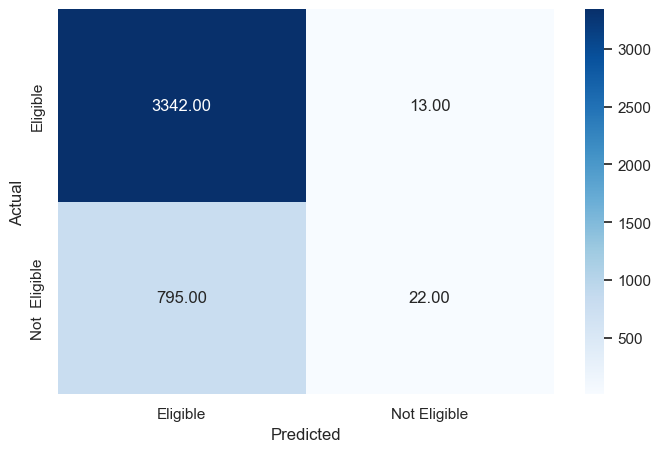

In [81]:
#Predict for train set
y_lr_train = model_lr.predict(X_train_clean_scaled)

#checking the performance on the train dataset
metrics_score(y_train_clean_scaled, y_lr_train)

**Observations :**

- The precision score is **0.63**, but the recall score is only **0.03** on the training data. The recall score is too low. This model is not working well.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1416
           1       0.45      0.01      0.03       372

    accuracy                           0.79      1788
   macro avg       0.62      0.50      0.45      1788
weighted avg       0.72      0.79      0.70      1788



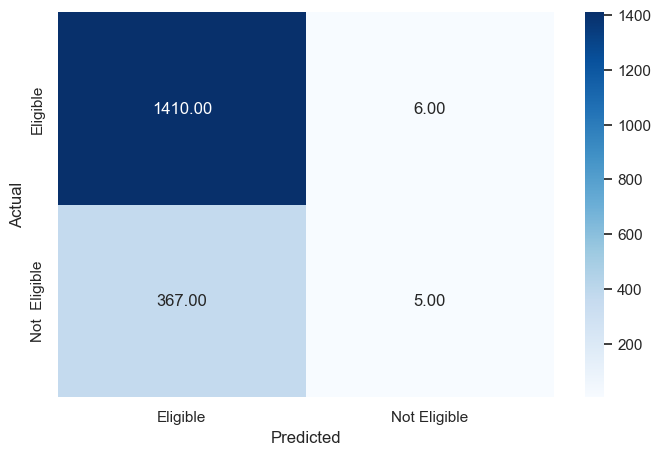

In [82]:
#Predict for test set
y_lr_test = model_lr.predict(X_test_clean_scaled)

#checking the performance on the test dataset
metrics_score(y_test_clean_scaled, y_lr_test)

**Observations :**

- The model is working even worse on the test data.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [83]:
# Printing the coefficients of logistic regression
# Get the coefficients and intercept
coefficients = model_lr.coef_
intercept = model_lr.intercept_

print("coefficients is:" )
print(coefficients)
print("\nIntercept:" )
print(intercept)

coefficients is:
[[-2.56376326e-05 -5.92370373e-06 -4.27407722e-07 -2.31701325e-02
   0.00000000e+00  0.00000000e+00 -7.01401124e-03  2.56101384e-02
   1.71916919e-03  2.34607707e-02  1.75784487e-04 -3.67615161e-03
  -1.39341877e-03 -9.51351915e-04  8.05495423e-04  1.30637508e-03]]

Intercept:
[-0.00249994]


In [84]:
odds = np.exp(model_lr.coef_[0]) # Finding the odds

# Adding the odds to a DataFrame and sorting the values
pd.DataFrame(odds, X_train_clean_scaled.columns, columns = ['odds']).sort_values(by = 'odds', ascending = False) 

,odds
NINQ,1.025941
DEBTINC,1.023738
CLNO,1.001721
JOB_Self,1.001307
JOB_Sales,1.000806
REASON_HomeImp,1.000176
DEROG,1.000000
DELINQ,1.000000
VALUE,1.000000
MORTDUE,0.999994


**Observations :**

- The most important features are : NINQ, DEBTINC, CLNO, and JOB_Self, their coefficient values are similar.

### **Build a Logistic Regression Model with another threshold than 0.5** 


**Let's find the best threshold buy plotting the  Precision-Recall Curve for Logistic Regression**

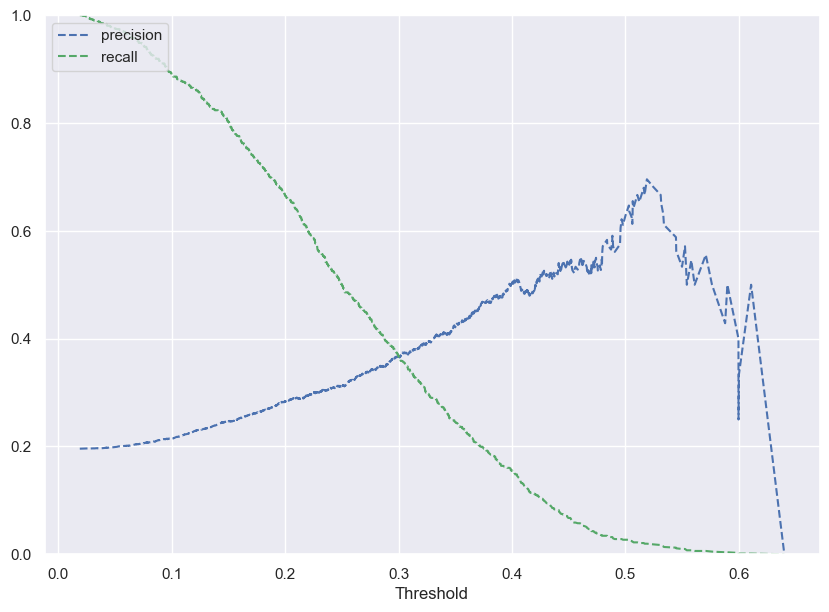

In [85]:
y_scores_lg = model_lr.predict_proba(X_train_clean_scaled) # predict_proba gives the probability of each observation belonging to each class

precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(y_train, y_scores_lg[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (10, 7))

plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label = 'precision')

plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label = 'recall')

plt.xlabel('Threshold')

plt.legend(loc = 'upper left')

plt.ylim([0, 1])

plt.show()

**Observations :**
- We can see that the precision and the recall are balanced for a threshold of about **0.3**.

**Let's find out the performance of the model at threshold 0.3.**

In [86]:
model_lr_threshold = LogisticRegression() 
model_lr_threshold.fit(X_train_clean_scaled,y_train_clean_scaled)
y_pred_prob = model_lr_threshold.predict_proba(X_train_clean_scaled)[:, 1]

threshold = 0.3
y_pred_class = (y_pred_prob >= threshold).astype(int)
#Predict for train set with lower threshold
#y_pred_train_lower_theshold = (model.predict(X_train)>0.3).astype(int)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      3355
           1       0.37      0.37      0.37       817

    accuracy                           0.75      4172
   macro avg       0.61      0.61      0.61      4172
weighted avg       0.75      0.75      0.75      4172



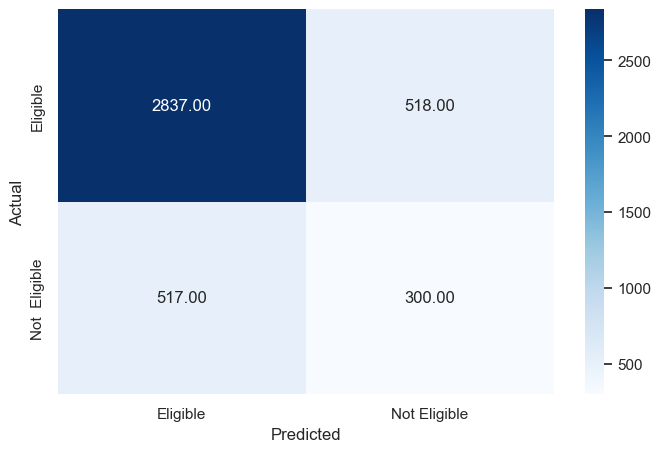

In [87]:
#checking the performance on the test dataset
metrics_score(y_train_clean_scaled, y_pred_class )

**Observations :**

- The model with adjusted weight works better. Both the precision and the recall scores are **0.37**. They are still too low.
- Let's check the performance on the test data.

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1416
           1       0.37      0.33      0.35       372

    accuracy                           0.74      1788
   macro avg       0.60      0.59      0.59      1788
weighted avg       0.73      0.74      0.74      1788



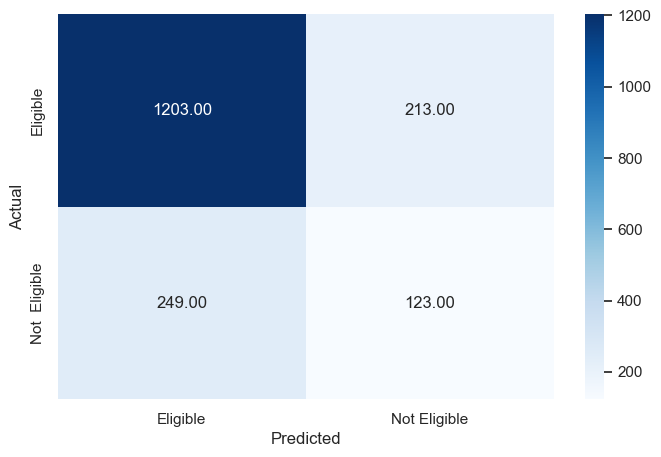

In [88]:
optimal_threshold1 = .30

y_pred_test = model_lr.predict_proba(X_test_clean_scaled)

metrics_score(y_test_clean_scaled, y_pred_test[:, 1] > optimal_threshold1)

**Observations :**

- The model is giving a **similar performance on the test data**.
- But the scores for the model are still low, so let's see if we can get better performance using other algorithms. 

## **KNN Model**

In [89]:
knn = KNeighborsClassifier()

# We select the optimal value of K for which the error rate is the least in the validation data
# Let us loop over a few values of K to determine the optimal value of K

train_error = []

test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()

features = X.columns

for k in range(1, 8):
    train_error = []
    
    test_error = []
    
    lista = []
    
    knn = KNeighborsClassifier(n_neighbors = k)
    
    #This loop runs 10 times, 
    #representing 10 different random splits of your training data into training and validation sets.
    for i in range(10):
          
        x_train_new, x_val, y_train_new, y_val = train_test_split(X_clean_scaled, Y_clean, test_size = 0.20)
   
        # Fitting K-NN on the training data
        knn.fit(x_train_new, y_train_new)
        
        # Calculating error on the training data and the validation data
        train_error.append(1 - knn.score(x_train_new.values, y_train_new.values)) 
        
        test_error.append(1 - knn.score(x_val.values, y_val.values))
    
    lista.append(sum(train_error)/len(train_error))
    
    lista.append(sum(test_error)/len(test_error))
    
    knn_many_split[k] = lista

knn_many_split

{1: [0.0, 0.22911073825503353],
 2: [0.12277684563758391, 0.18296979865771812],
 3: [0.11906459731543624, 0.19295302013422821],
 4: [0.14960151006711406, 0.1811241610738255],
 5: [0.14836409395973155, 0.1855704697986577],
 6: [0.1617239932885906, 0.18540268456375836],
 7: [0.1582005033557047, 0.18380872483221475]}

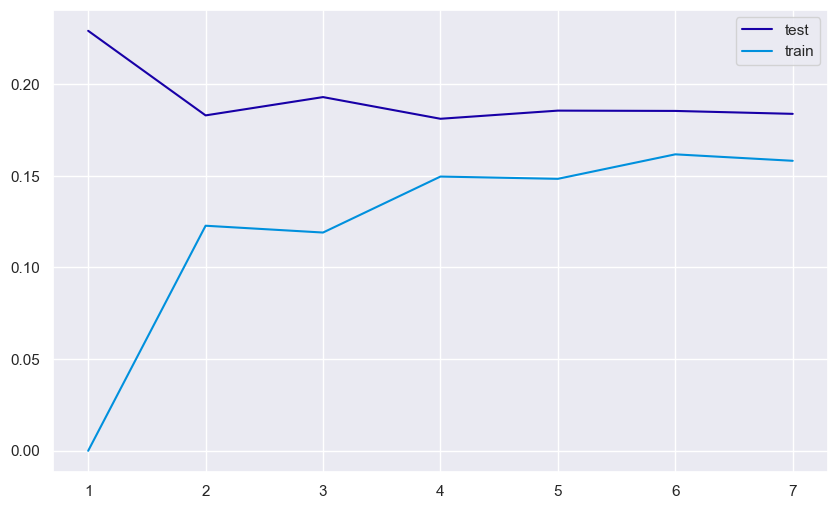

In [90]:
kltest = []

vltest = []

for k, v in knn_many_split.items():
    kltest.append(k)
    
    vltest.append(knn_many_split[k][1])

kltrain = []

vltrain = []

for k, v in knn_many_split.items():
    kltrain.append(k)
    
    vltrain.append(knn_many_split[k][0])

# Plotting K vs Error
plt.figure(figsize = (10, 6))

plt.plot(kltest, vltest, label = 'test' )

plt.plot(kltrain, vltrain, label = 'train')

plt.legend()

plt.show()

**Observations :**
- We can see that the test error (error on the validation data) is more or less similar for K greater than or equal to 3. But the training error keeps increasing with increasing K.
- This implies that we would get a lower train and test error if we choose K = 3. Also, if we choose a higher value of K, the model would get biased due to the imbalance in the dataset.
- So, let's fit the K-NN model with **K=3** on the entire training set.

In [91]:
# Convert DataFrames to numpy arrays
x_train_new = X_train_clean_scaled.values
x_val = X_test_clean_scaled.values
y_train_new = y_train_clean_scaled.values
y_val = y_test_clean_scaled.values

In [92]:
# Define K-NN model

knn = KNeighborsClassifier(n_neighbors = 3)

In [93]:
# Fitting data to the K-NN model
knn.fit(x_train_new,y_train_new)

KNeighborsClassifier(n_neighbors=3)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3355
           1       0.83      0.49      0.61       817

    accuracy                           0.88      4172
   macro avg       0.86      0.73      0.77      4172
weighted avg       0.88      0.88      0.87      4172



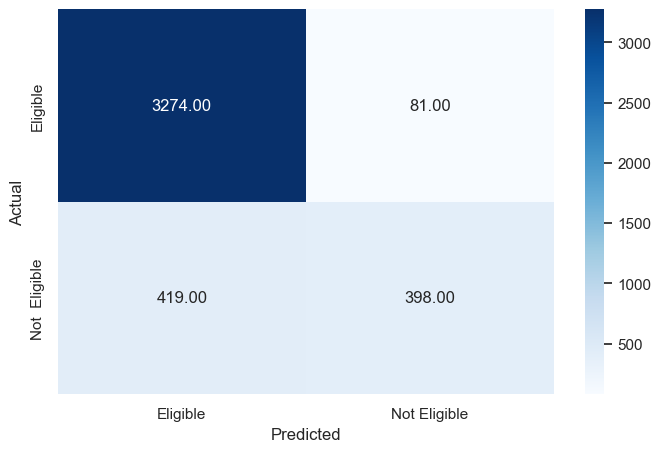

In [94]:
# Assuming X_test and y_test are DataFrames


# Checking the performance of K-NN model on the training data
y_pred_train_knn = knn.predict(x_train_new)

metrics_score(y_train_new, y_pred_train_knn)

**Observations :**

- This KNN model is giving much higher precision score **0.83** on the training data, the recall score **0.49** is still too low. Let's see its performance on the test data.

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1416
           1       0.54      0.25      0.34       372

    accuracy                           0.80      1788
   macro avg       0.68      0.60      0.61      1788
weighted avg       0.77      0.80      0.77      1788



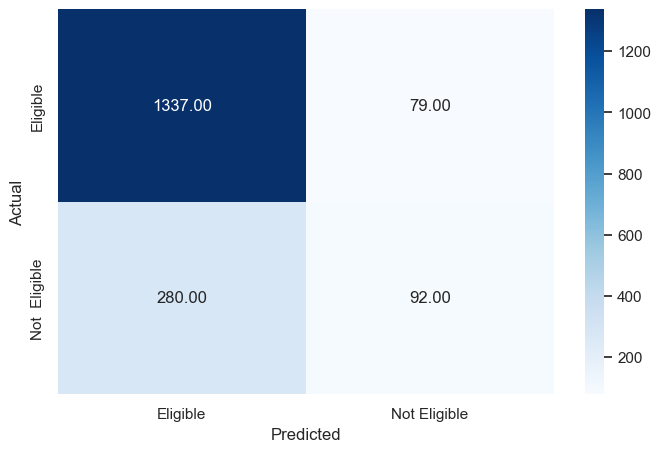

In [95]:
# Checking the performance of K-NN model on the testing data
y_pred_test_knn = knn.predict(x_val)

metrics_score(y_val, y_pred_test_knn)

**Observations :**
- The performance of the model has gone down on the test dataset. Let's see if we can improve on that using hyperparameter tuning.

**Using GridSearchCV for Hyperparameter tuning of the model**

In [96]:
params_knn = {'n_neighbors': np.arange(3, 5), 'weights': ['uniform', 'distance'], 'p': [1, 2]}

# As we prefer to have higher recall score, we choose scoring='recall_score'
grid_knn = GridSearchCV(estimator = knn, param_grid = params_knn, scoring = 'recall', cv = 10)

model_knn = grid_knn.fit(x_train_new,y_train_new)

knn_tuned = model_knn.best_estimator_

print(knn_tuned)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')


In [97]:
# Fit the best estimator on the training data
knn_tuned.fit(x_train_new, y_train_new)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



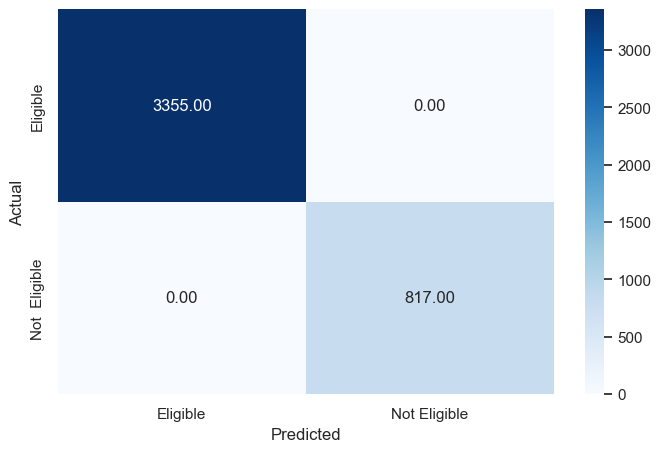

In [98]:
y_pred_train_knn_tuned = knn_tuned.predict(x_train_new)

metrics_score(y_train_new, y_pred_train_knn_tuned)

**Observations :**

- The KNN Model is giving a 100% score for all metrics on the training dataset. It has probably overfitting problem. Let's check its performance on the test data.

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1416
           1       0.53      0.27      0.36       372

    accuracy                           0.80      1788
   macro avg       0.68      0.61      0.62      1788
weighted avg       0.77      0.80      0.77      1788



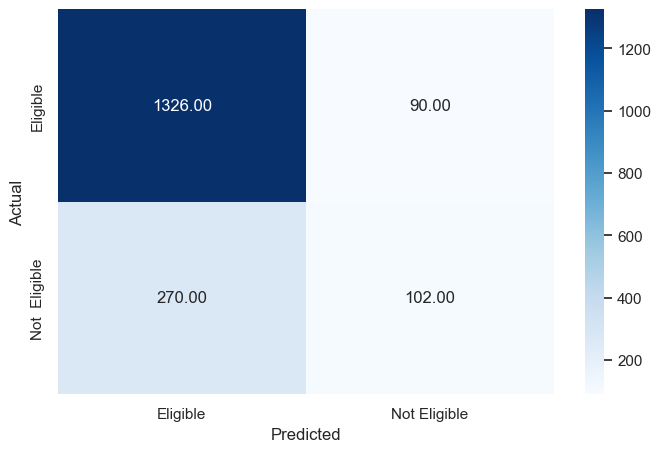

In [99]:
y_pred_test_knn_tuned = knn_tuned.predict(x_val)

metrics_score(y_val, y_pred_test_knn_tuned)

**Observations :**

- The model is not working well on the test data, it confirms that the tuned KNN model is overfitting the training data.


### **Build a Decision Tree Model**

In [100]:
# As there is 20% of default in the dataset, the best class weights should be {0: 0.2, 1: 0.8}
model_dt = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

In [101]:
#fitting Decision tree model
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [102]:
#predict on train data
y_pred_tree=model_dt.predict(X_train)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



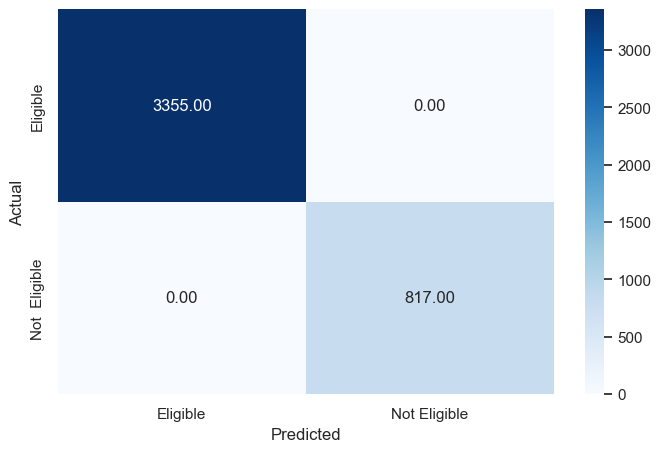

In [103]:
# Checking performance on the training data
metrics_score(y_train, y_pred_tree )

**Observations :**

- The Decision Tree Model is giving a **100% score for all metrics on the training dataset**. It has probably **overfitting** problem.

#### Checking the performance on the test dataset

In [104]:
#predict on test data
y_test_tree=model_dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1416
           1       0.65      0.56      0.60       372

    accuracy                           0.85      1788
   macro avg       0.77      0.74      0.75      1788
weighted avg       0.84      0.85      0.84      1788



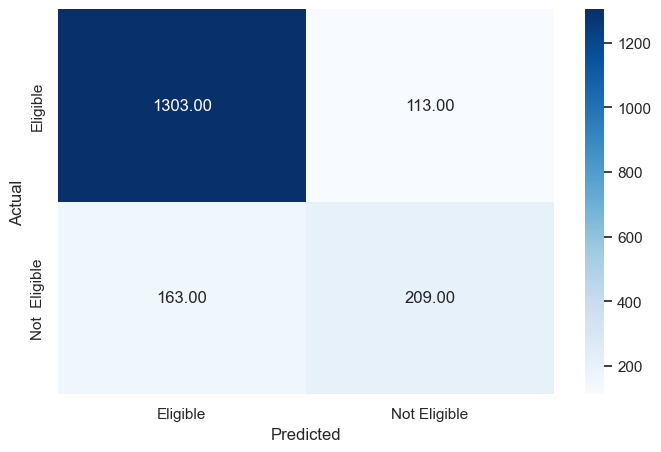

In [105]:
# Checking performance on the testing data
metrics_score(y_test, y_test_tree )

**Observations :**

- The Decision Tree works well on the training data but **not so well on the test data** as the precision is 0.65 and recall is 0.56. The Decision Tree is overfitting the training data.

### **Feature importance check**
**Let's plot the feature importance and check the most important features.**

<Axes: xlabel='Importance', ylabel='None'>

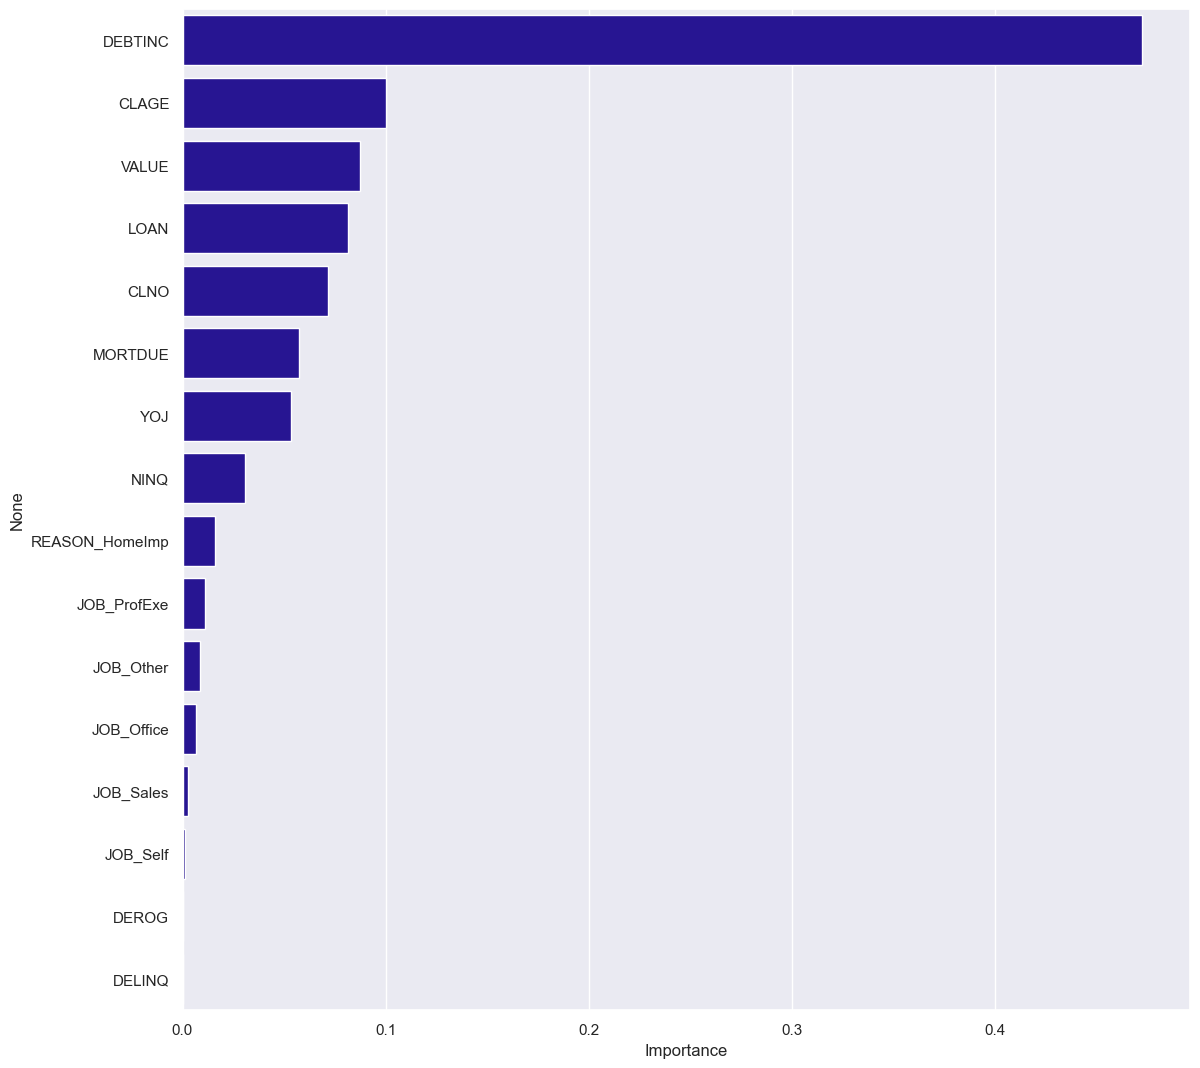

In [106]:
importances = model_dt.feature_importances_

columns = X.columns

importance_df = pd.DataFrame(importances, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_df.Importance,y=importance_df.index)

In [107]:
feature_importance_dict = dict(zip(columns, importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print and plot feature importances
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
DEBTINC: 0.4721
CLAGE: 0.1000
VALUE: 0.0874
LOAN: 0.0816
CLNO: 0.0714
MORTDUE: 0.0573
YOJ: 0.0533
NINQ: 0.0310
REASON_HomeImp: 0.0158
JOB_ProfExe: 0.0108
JOB_Other: 0.0085
JOB_Office: 0.0067
JOB_Sales: 0.0026
JOB_Self: 0.0013
DEROG: 0.0000
DELINQ: 0.0000


**Observations :**

- We see from the chart that the most important features who drive the default prediction are **DEBTINC : 0.47**, **CLAGE : 0.1** and **VALUE : 0.09**. 

**Decision Tree - Hyperparameter Tuning**

* We'll use Grid search to perform hyperparameter tuning.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


#### Using GridSearchCV for Hyperparameter tuning on the model

In [108]:
# Choose the type of classifier, as there is 20% of default, we use class weights 0.2:0.8
model_dt_tuned = DecisionTreeClassifier(class_weight = {0: 0.2, 1: 0.8}, random_state = 1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2, 5),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [10,20,30]
             }

# Type of scoring used to compare parameter combinations
# Ss we prefer to have higher recall score, we choose scoring='recall_score'
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search
gridCV = GridSearchCV(model_dt_tuned, parameters, scoring = scorer, cv = 5)

# Fitting the grid search on the train data
gridCV = gridCV.fit(X_train, y_train)

# Set the classifier to the best combination of parameters
model_dt_tuned = gridCV.best_estimator_

# Fit the best estimator to the data
model_dt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=3,
                       min_samples_leaf=20, random_state=1)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      3355
           1       0.60      0.78      0.68       817

    accuracy                           0.86      4172
   macro avg       0.77      0.83      0.79      4172
weighted avg       0.88      0.86      0.86      4172



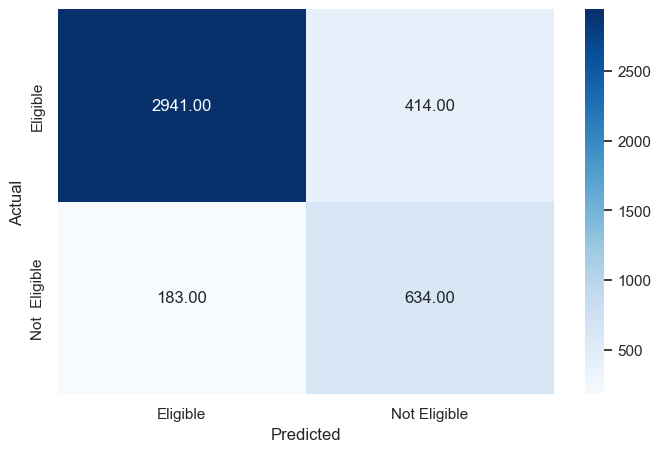

In [109]:
# Checking performance on the training data based on the tuned model
y_train_pred_dt = model_dt_tuned.predict(X_train)

metrics_score(y_train, y_train_pred_dt)

**Observations :**

- In comparison to the model with default values of hyperparameters, **the performance of the tuned model on the training data has gone down.** This makes sense because we are trying to reduce overfitting.
- The model is giving **0.78** recall score, it is a good score. Let's check its performance on the test data.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.88      0.90      1416
           1       0.62      0.73      0.67       372

    accuracy                           0.85      1788
   macro avg       0.77      0.81      0.79      1788
weighted avg       0.86      0.85      0.85      1788



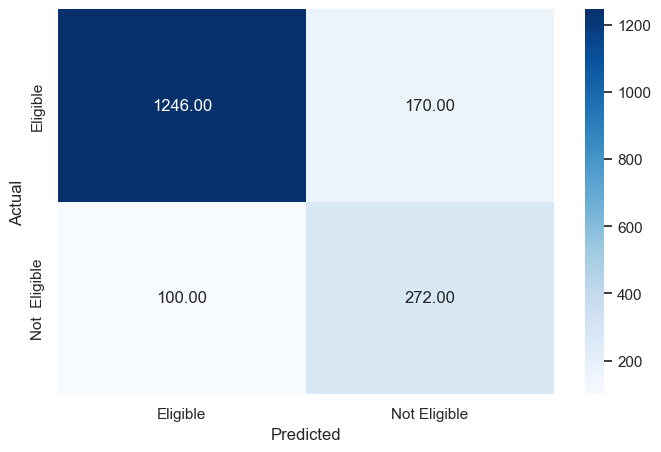

In [110]:
# Checking performance on the test dataset
y_test_pred_dt = model_dt_tuned.predict(X_test)

metrics_score(y_test, y_test_pred_dt)

In [111]:
gridCV.best_params_

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}

**Observations :**

- Compared to its performance on training data, the scores on the test data have slightly decreased.

- The Best Hyperparameters used : {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}

#### Plotting the Decision Tree

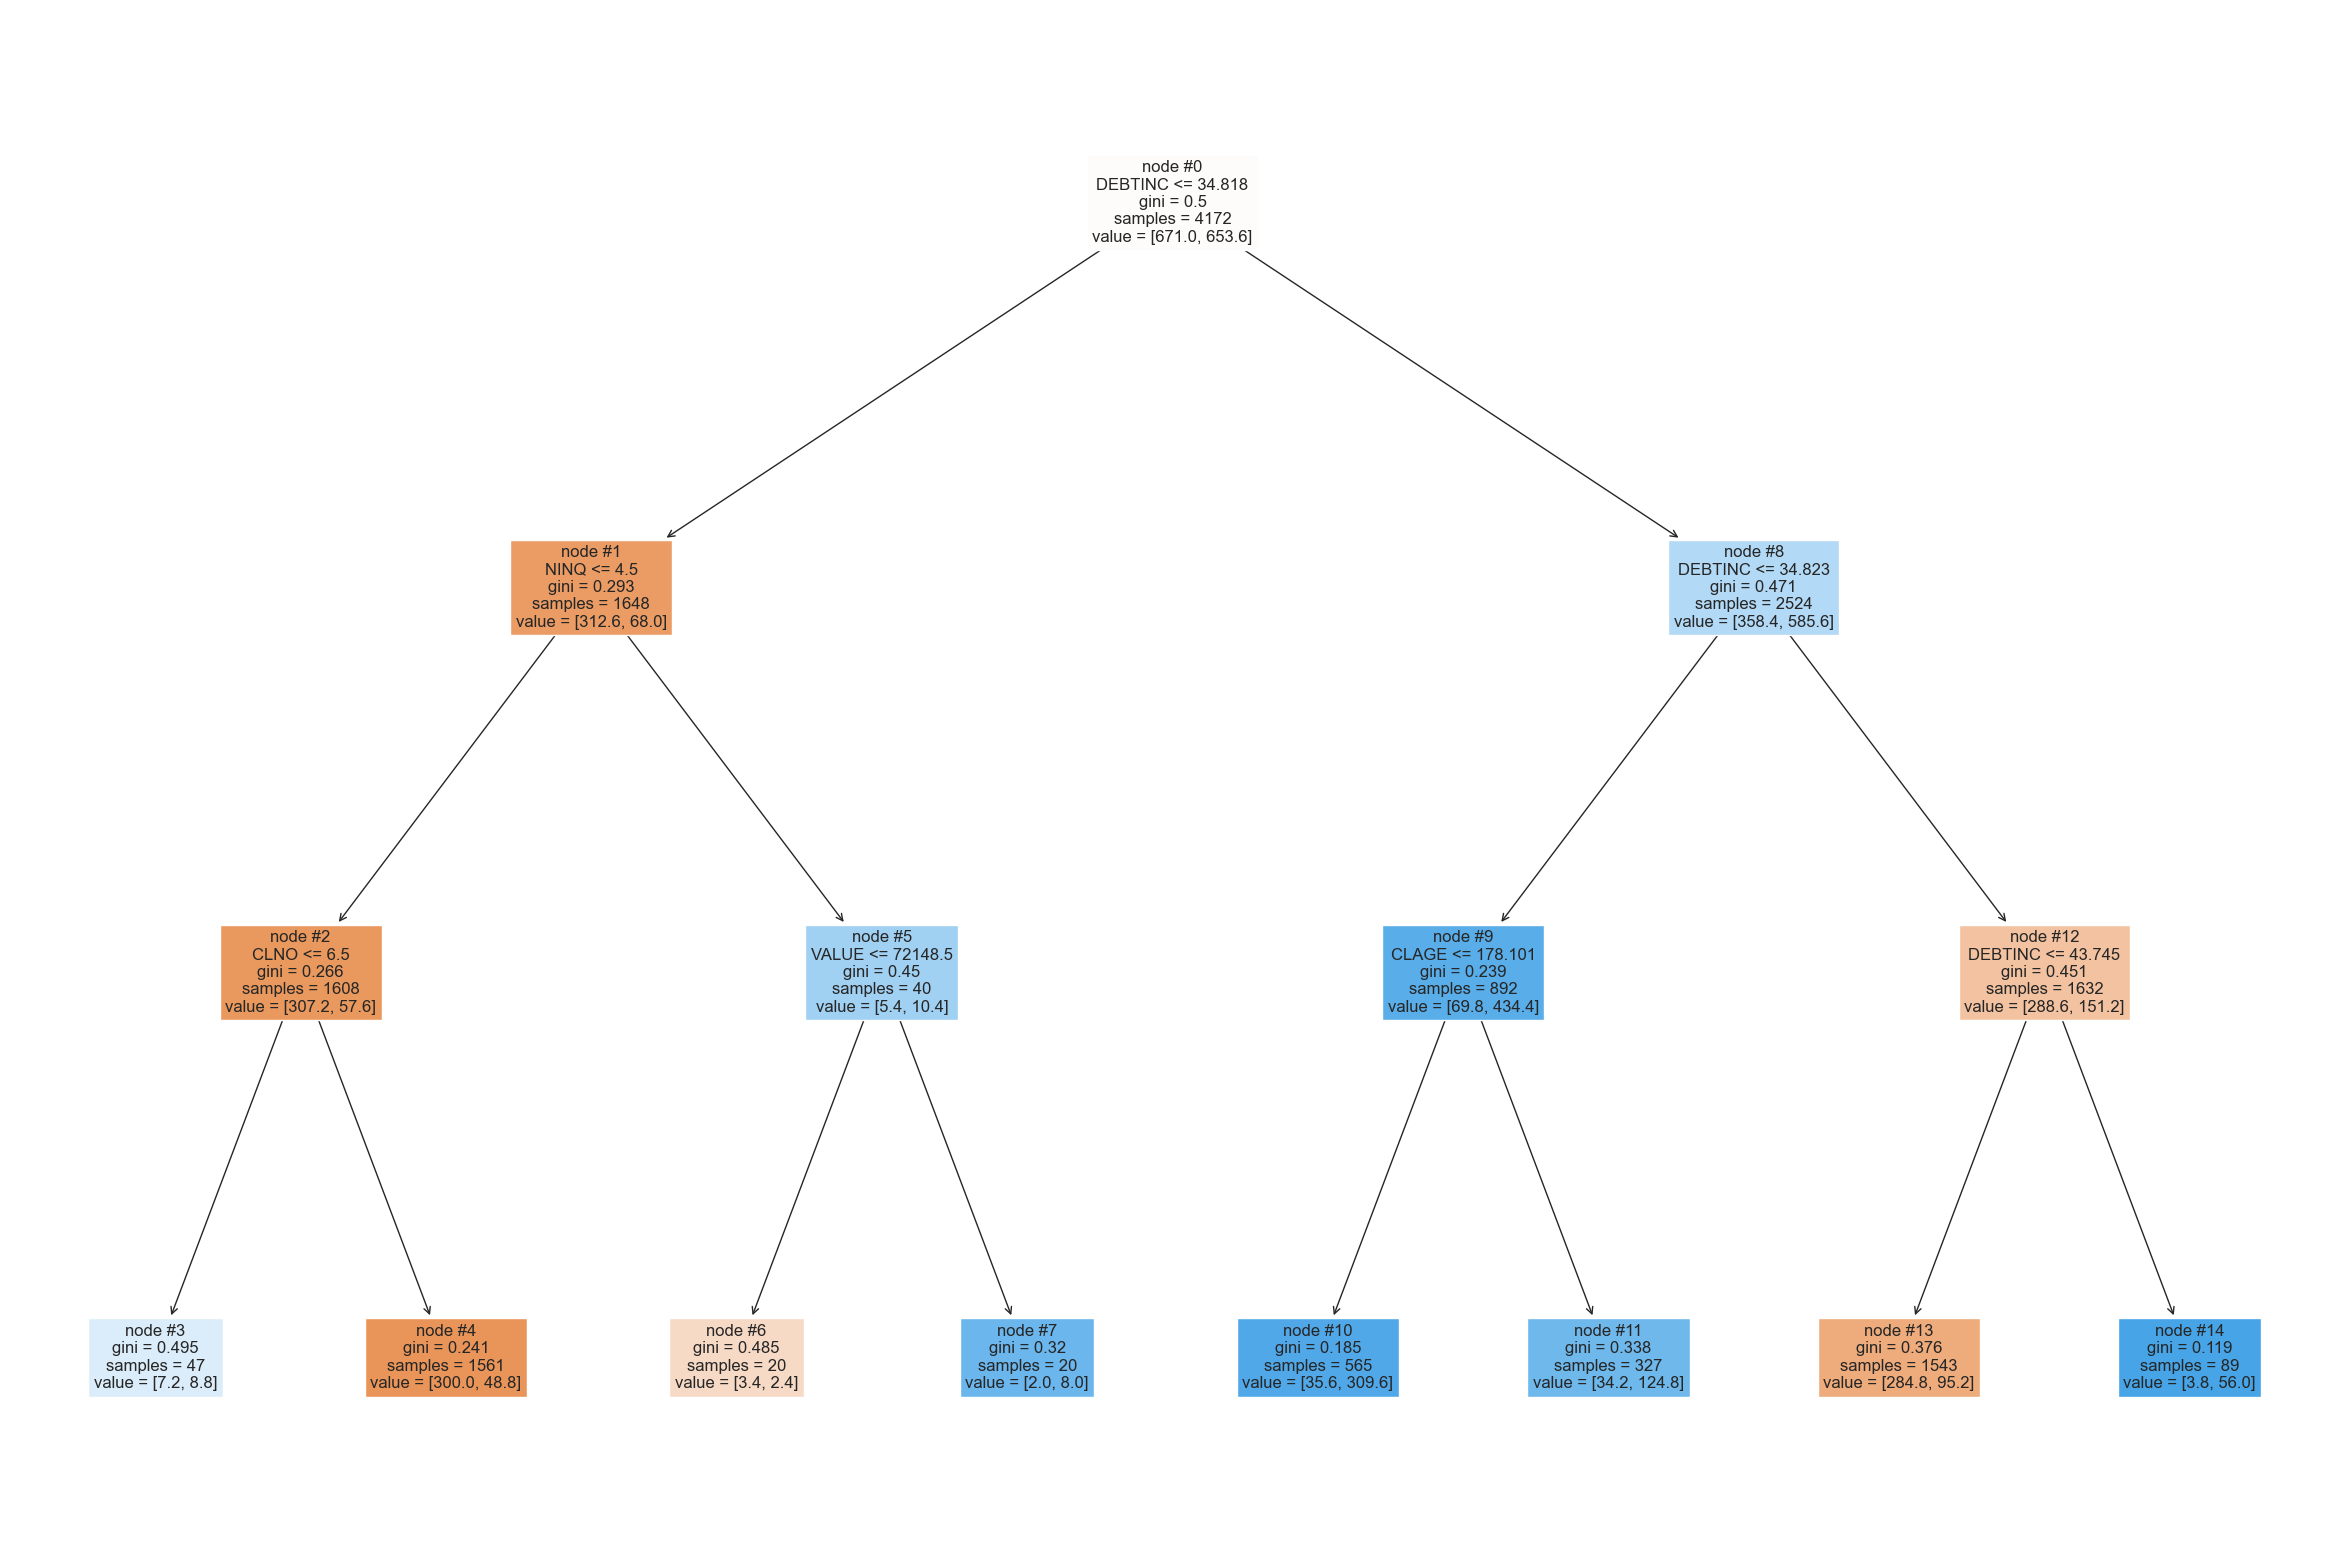

In [112]:
features = list(X.columns)

# Get feature importances
feature_importances = model_dt_tuned.feature_importances_

plt.figure(figsize = (30, 20))

tree.plot_tree(model_dt_tuned, max_depth = 4, feature_names = features, filled = True, fontsize = 12, node_ids = True)

plt.show()

In [113]:
feature_importance_dict = dict(zip(features, feature_importances))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print and plot feature importances
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
DEBTINC: 0.9443
NINQ: 0.0255
CLNO: 0.0173
CLAGE: 0.0092
VALUE: 0.0037
LOAN: 0.0000
MORTDUE: 0.0000
YOJ: 0.0000
DEROG: 0.0000
DELINQ: 0.0000
REASON_HomeImp: 0.0000
JOB_Office: 0.0000
JOB_Other: 0.0000
JOB_ProfExe: 0.0000
JOB_Sales: 0.0000
JOB_Self: 0.0000


<Axes: xlabel='Importance', ylabel='None'>

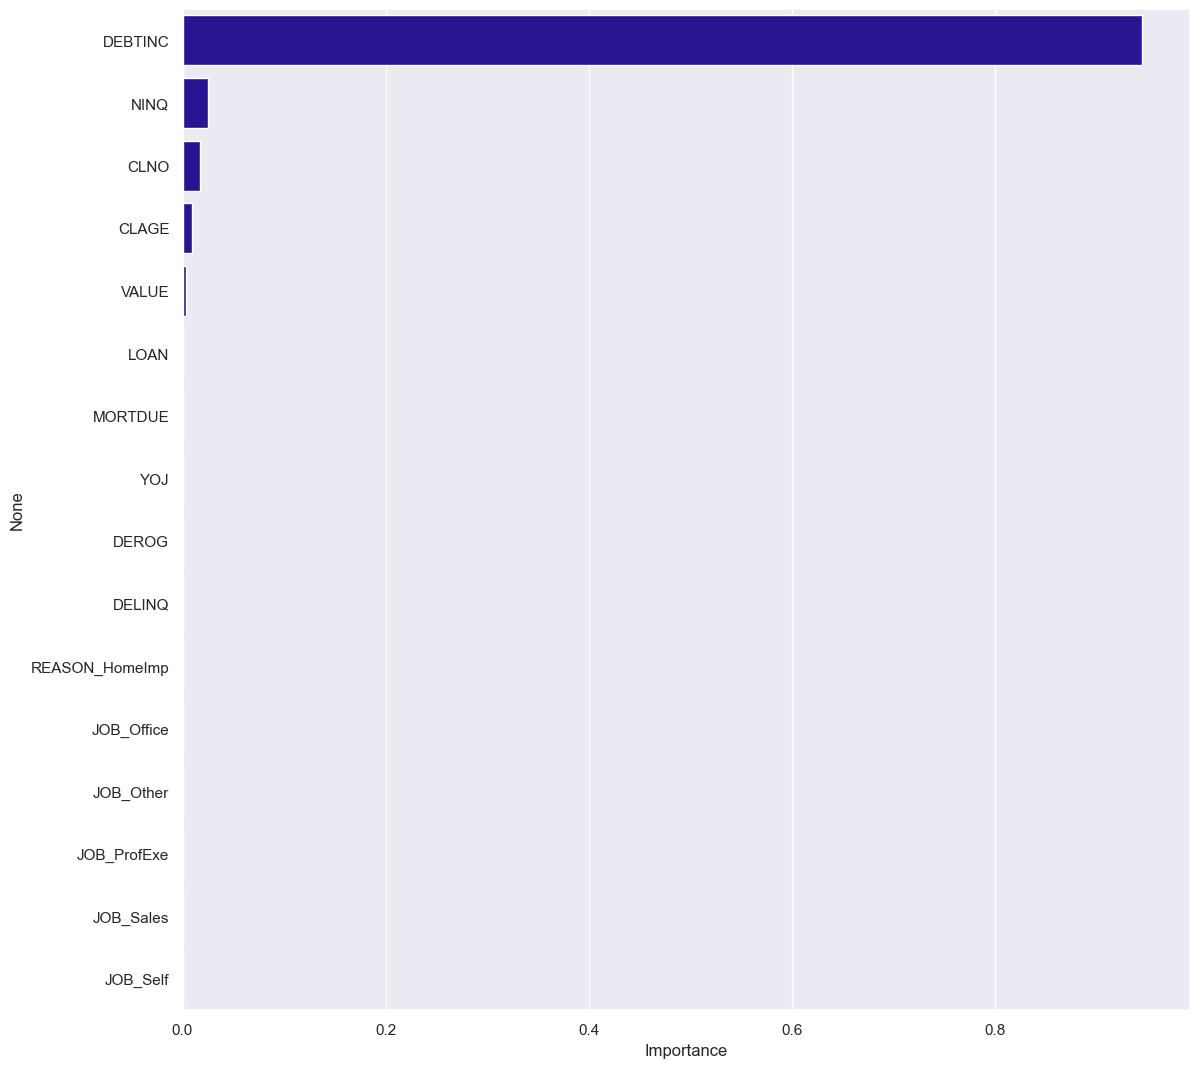

In [114]:
importances_t = model_dt_tuned.feature_importances_

columns = X.columns

importance_tured = pd.DataFrame(importances_t, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_tured.Importance,y=importance_tured.index)

**Observations :**
- Blue leaves represent the loan with default, and the orange leaves represent the good loan. Also, the more the number of observations in a leaf, the darker its color gets.
- **The DEBTINC is the most important driver to predict the loan default : 94% contribution, NINQ, CLNO, CLAGE and VALUE have little contribution, the others do not have impact.**


### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [115]:
#Defining Random forest CLassifier. As there is 20% of default, the best class weights should be 0.2:0.8
rf_estimator = RandomForestClassifier(class_weight = {0: 0.2, 1: 0.8},  random_state = 1)

In [116]:
# Fitting the Random Forest classifier on the training data
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [117]:
# make prediction with the training data
y_pred_train_rf=rf_estimator.predict(X_train)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3355
           1       1.00      1.00      1.00       817

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



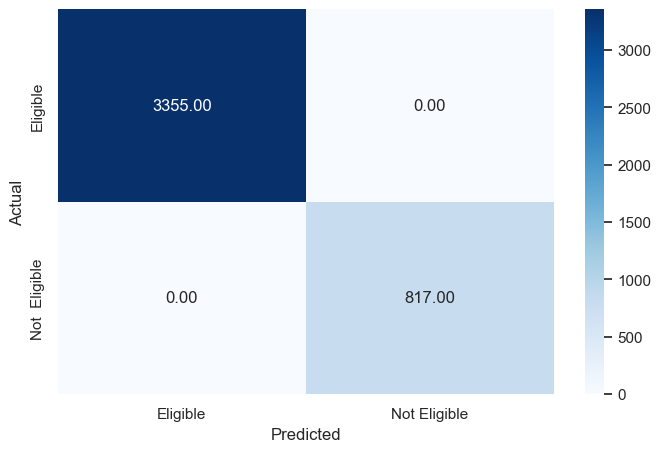

In [118]:
#Checking performance on the training data
metrics_score(y_train, y_pred_train_rf)

**Observations :**

- The Random Forest is giving a **100% score for all metrics on the training dataset.** Let's check its performance on the test data and if there is overfitting.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.98      0.93      1416
           1       0.86      0.57      0.68       372

    accuracy                           0.89      1788
   macro avg       0.88      0.77      0.81      1788
weighted avg       0.89      0.89      0.88      1788



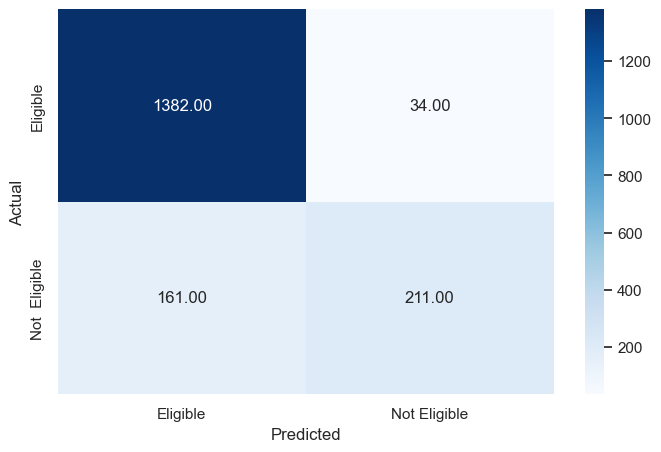

In [119]:
# Checking performance on the test data
y_pred_test_rf=rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test_rf)

In [120]:
print('n_estimators : ',rf_estimator.n_estimators)
print('min_samples_leaf: ',rf_estimator.min_samples_leaf)
print('max_features: ',rf_estimator.max_features)
print('criterion: ',rf_estimator.criterion)
print('min_samples_split: ',rf_estimator.min_samples_split)

n_estimators :  100
min_samples_leaf:  1
max_features:  sqrt
criterion:  gini
min_samples_split:  2


**Observations :**

- The Random Forest Classifier is overfitting the training data.

- The paramers used by this models are : n_estimators :  100, min_samples_leaf:  1, max_features:  sqrt, criterion:  gini, min_samples_split:  2. Let's do the model tuning using the hyperparamers nearby values.

**Random Forest - Hyperparameter Tuning**

In [121]:
# Grid of parameters to choose from
params_rf = {
        "n_estimators": [110],
        "min_samples_leaf": np.arange(5,10),
        "max_depth":[4,5],
        "max_features": [0.8,0.9,'sqrt'],
        "criterion": [ 'entropy'],      
}


# We would like to have higher recall score, we choose recall_score as criteria
scorer = metrics.make_scorer(recall_score, pos_label = 1)

# Run the grid search,fit the GridSearch on train dataset
grid_obj_rf = GridSearchCV(rf_estimator, params_rf, scoring = scorer, cv = 5).fit(X_train, y_train)

# Set the classifier to the best combination of parameters
rf_estimator_tuned = grid_obj_rf .best_estimator_

#### Checking the performance on the training dataset

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      3355
           1       0.48      0.84      0.61       817

    accuracy                           0.79      4172
   macro avg       0.71      0.81      0.73      4172
weighted avg       0.86      0.79      0.81      4172



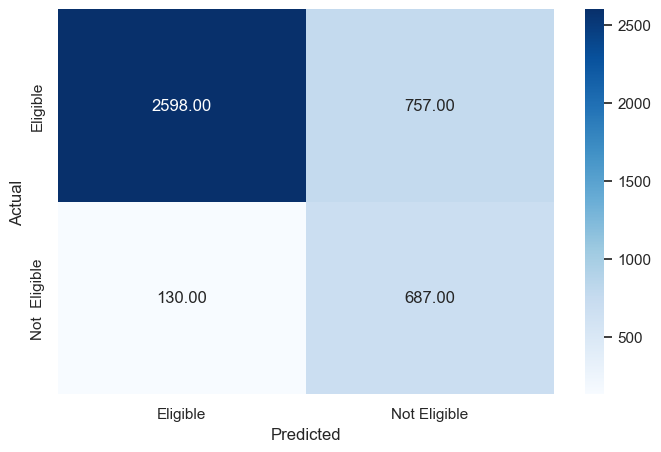

In [122]:
# Fit the best algorithm to the data. 
y_pred_train_turned=rf_estimator_tuned.predict(X_train)
# Checking performance on the training data
metrics_score(y_train, y_pred_train_turned)

**Observations :**

- In comparison to the model with default values of hyperparameters, **the performance of the tuned model on the training data has gone down.** This makes sense because we are trying to reduce overfitting. It works very well on training data. Let's see its performance on the test data and see if it is overfitting the training data.

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1416
           1       0.48      0.79      0.60       372

    accuracy                           0.78      1788
   macro avg       0.71      0.78      0.72      1788
weighted avg       0.84      0.78      0.80      1788



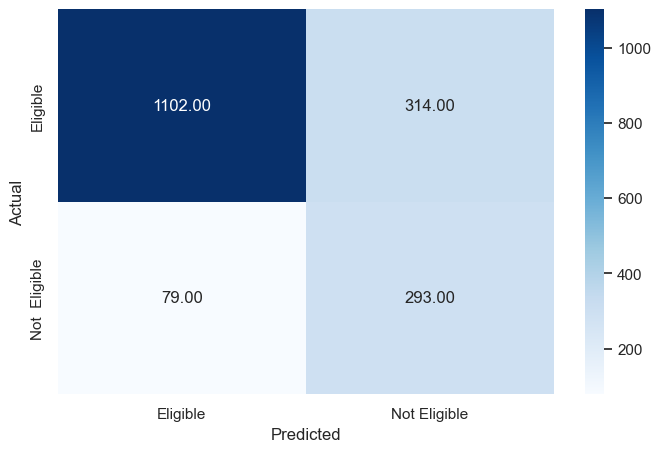

In [123]:
# Checking performance on the test data
y_pred_test_turned=rf_estimator_tuned.predict(X_test)
metrics_score(y_test, y_pred_test_turned)

In [124]:
print(grid_obj_rf.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'n_estimators': 110}


**Observations :**

- The tuned model is also slightly overfitting the training dataset, but **it shows a good performance on the test dataset.**
- **This Tuned Random Forest Model gives the highest recall score 0.79 which means this model will give a high number of true positive and low number of false negative. This model will better predict the default risk and prevent the bank from losing profit due to the default. This model is the best-performing one among all the models so far**.
- The hyperparameters used are : {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 7, 'n_estimators': 110}

#### Plot the Feature importance of the tuned Random Forest

<Axes: xlabel='Importance', ylabel='None'>

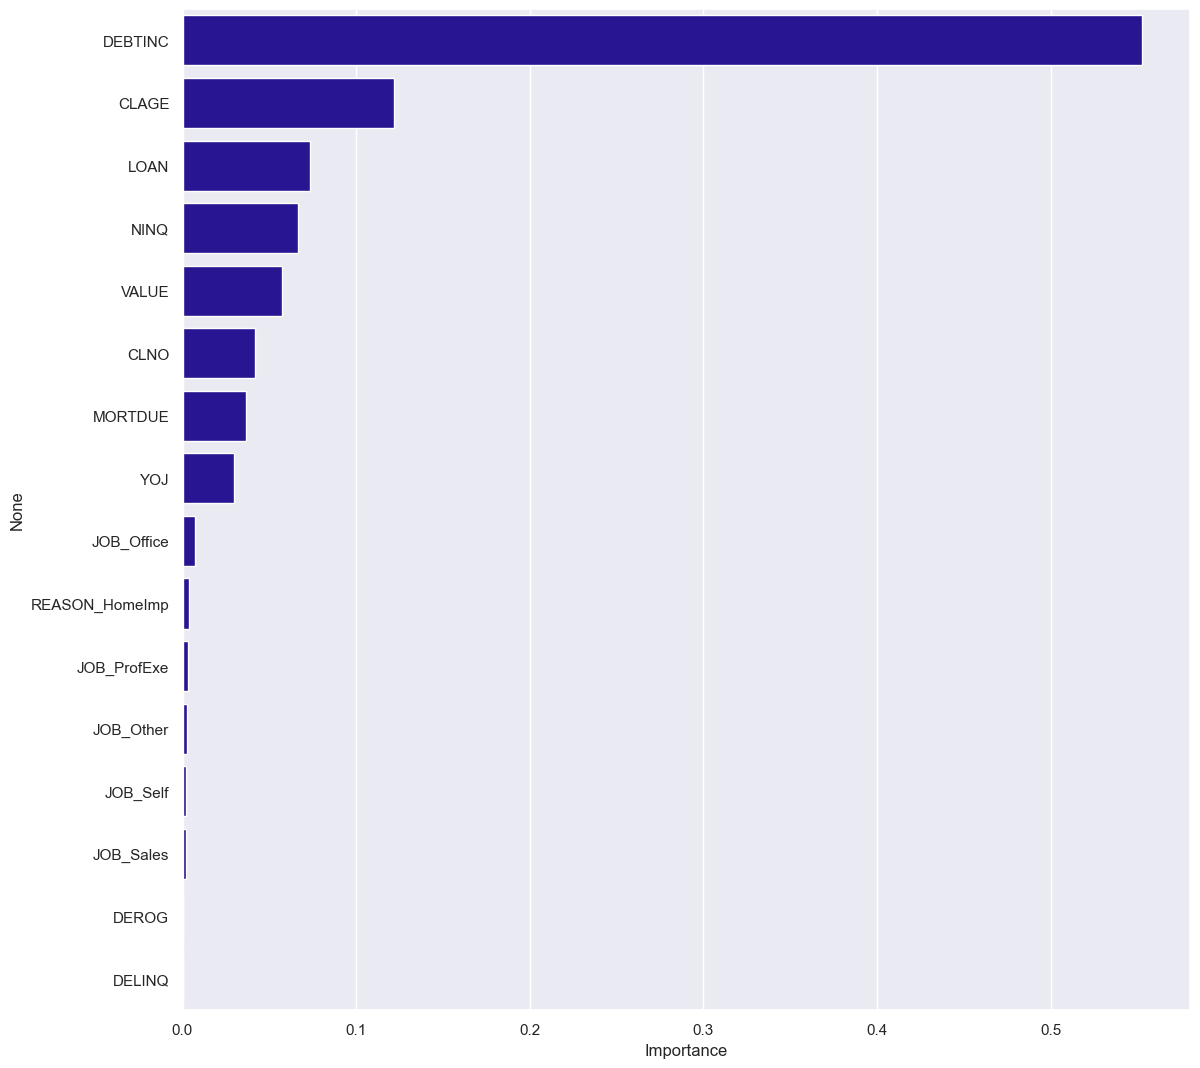

In [125]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
importances_t = rf_estimator_tuned.feature_importances_

columns = X.columns

importance_tured = pd.DataFrame(importances_t, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_tured.Importance,y=importance_tured.index)

In [126]:
#print the feature importance
# Map feature names to their corresponding importances
feature_importance_dict = dict(zip(importance_tured.index, importance_tured.Importance))

# Sort features by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print and plot feature importances
print("Feature Importances:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")

Feature Importances:
DEBTINC: 0.5527
CLAGE: 0.1221
LOAN: 0.0737
NINQ: 0.0665
VALUE: 0.0572
CLNO: 0.0416
MORTDUE: 0.0368
YOJ: 0.0297
JOB_Office: 0.0071
REASON_HomeImp: 0.0036
JOB_ProfExe: 0.0029
JOB_Other: 0.0024
JOB_Self: 0.0020
JOB_Sales: 0.0018
DEROG: 0.0000
DELINQ: 0.0000


**Observations :**

- We see from the chart that the most important features are : 
    - **DEBTINC : 0.56**, 
    - **CLAGE : 0.12** 
    - **LOAN : 0.07**. 
- The features like **DEROG** and **DELINQ** do not have an important effect.

### **Let's try also Boosting Models**

In [127]:
# Installing the xgboost library using the 'pip' command.
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 326.8 kB/s eta 0:05:06
   ---------------------------------------- 0.1/99.8 MB 585.1 kB/s eta 0:02:51
   ---------------------------------------- 0.1/99.8 MB 602.4 kB/s eta 0:02:46
   ---------------------------------------- 0.2/99.8 MB 908.0 kB/s eta 0:01:50
   ---------------------------------------- 0.2/99.8 MB 908.0 kB/s eta 0:01:50
   ---------------------------------------- 0.3/99.8 MB 811.7 kB/s eta 0:02:03
   ---------------------------------------- 0.3/99.8 MB 811.7 kB/s eta 0:02:03
   -----------------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [128]:
# Importing the AdaBoostClassifier and GradientBoostingClassifier [Boosting]
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

# Importing the XGBClassifier from the xgboost library
from xgboost import XGBClassifier

**Ada Boost Model**

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1416
           1       0.75      0.56      0.64       372

    accuracy                           0.87      1788
   macro avg       0.82      0.76      0.78      1788
weighted avg       0.86      0.87      0.86      1788



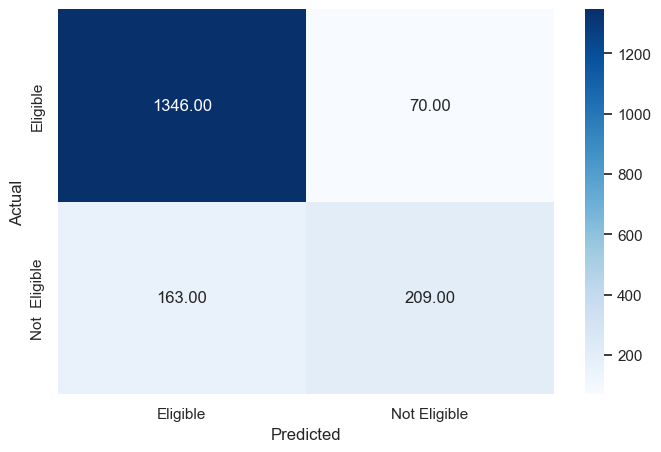

In [129]:
# Adaboost Classifier
adaboost_model = AdaBoostClassifier(n_estimators=100,random_state = 1)

# Fitting the model
adaboost_model.fit(X_train, y_train)

y_pred_test_adaboost=adaboost_model.predict(X_test)

# Model Performance on the test data
adaboost_model_perf_test = metrics_score(y_test,y_pred_test_adaboost)


adaboost_model_perf_test

**Gradient Boost Model**

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1416
           1       0.78      0.59      0.67       372

    accuracy                           0.88      1788
   macro avg       0.84      0.77      0.80      1788
weighted avg       0.87      0.88      0.87      1788



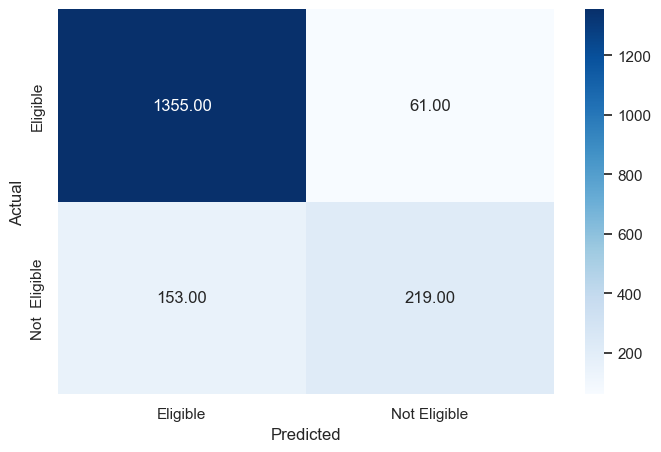

In [130]:
# Gradient Boost Classifier
gbc = GradientBoostingClassifier(random_state = 1)

# Fitting the model
gbc.fit(X_train, y_train)

y_pred_test_gbc=gbc.predict(X_test)

# Model Performance on the test data
gbc_perf_test = metrics_score(y_test,y_pred_test_gbc)

gbc_perf_test

**XGBoost Model**

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1416
           1       0.83      0.63      0.72       372

    accuracy                           0.90      1788
   macro avg       0.87      0.80      0.83      1788
weighted avg       0.89      0.90      0.89      1788



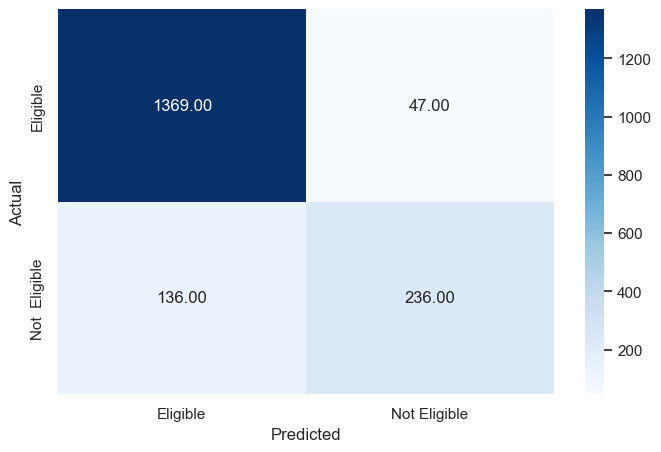

In [131]:
# XGBoost Classifier
xgb = XGBClassifier(random_state = 1, eval_metric = 'logloss')

# Fitting the model
xgb.fit(X_train,y_train)

y_pred_test_xgb=xgb.predict(X_test)

# Model Performance on the test data
xgb_perd_test = metrics_score(y_test,y_pred_test_xgb)

xgb_perd_test


 **XGBoost - Hyperparameter Tuning**

In [132]:
param_grid = {
    'learning_rate': [ 0.1,0.15],
    'n_estimators': [ 250],
     'min_child_weight': [3, 5],
    'subsample': [0.8],
    'max_depth': [5,6],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

#others parameters
'''
   'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 1, 2],
    'reg_lambda': [0, 1, 2]
    '''

# Create a GridSearchCV object
grid_search = GridSearchCV(xgb, param_grid, scoring='recall', cv=5)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_

# Random Search
#random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid, n_iter=20, cv=5, scoring='recall', random_state=1)
#random_search.fit(X_train, y_train)
#best_params=random_search.best_params_

xgb_tuned = XGBClassifier(**best_params, class_weight = {0: 0.2, 1: 0.8},random_state=1)

xgb_tuned.fit(X_train, y_train)

# Checking performance on the test data
y_pred_test_xgb_tuned = xgb_tuned.predict(X_test)

metrics_score(y_test, y_pred_test_xgb_tuned)

In [ ]:
print(best_params)

{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 250, 'subsample': 0.8}


**Observations :**

- The tuned model is performing better in comparison to the model with default values of hyperparameters, but its recall score is lower than the Random Forest Tuned Model.
- The best hyperparameters used are : {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 250, 'subsample': 0.8}

<Axes: xlabel='Importance'>

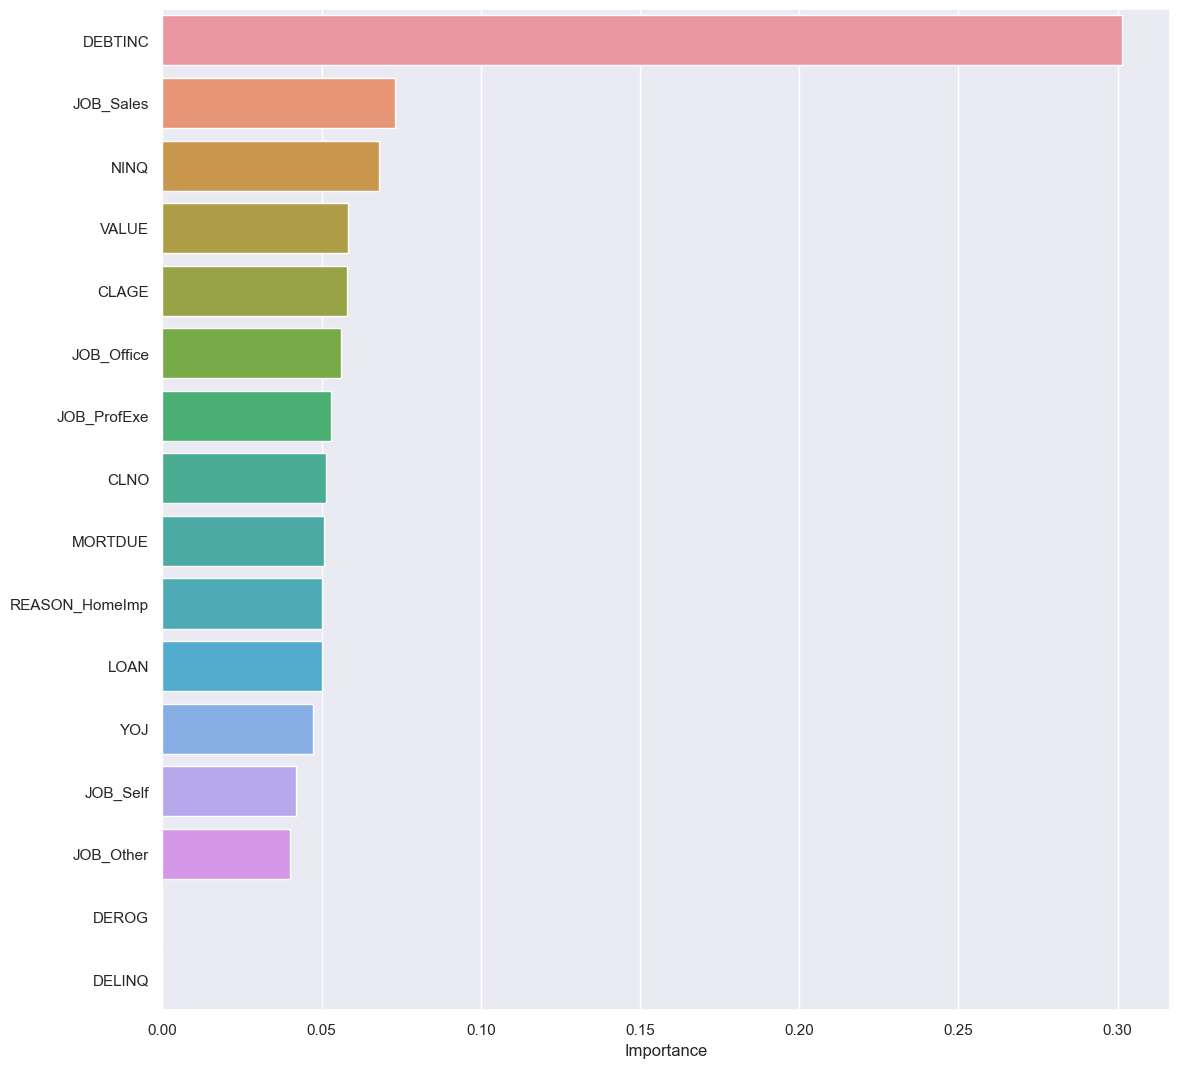

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset
importances_t = xgb_tuned.feature_importances_

columns = X.columns

importance_tured = pd.DataFrame(importances_t, index = columns, columns = ['Importance']).sort_values(by = 'Importance', ascending = False)

plt.figure(figsize = (13, 13))

sns.barplot(x=importance_tured.Importance,y=importance_tured.index)

**Observations :**

- We see from the chart that the most important **features** are **DEBTINC**, **JOB_Sales** and **NINQ**. There are different from the features chosen by Random Forest Tuned Model, it might be the reason to explain the less performance of this model.

### **Comparing Model Performances**

In [ ]:
def get_recall_score(model,flag=True,X_train=X_train.values,X_test=X_test.values):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [ ]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train.values,X_test=X_test.values):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train.values,X_test=X_test.values):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [ ]:
# Make the list of all the model names 

models = [ model_lr,model_lr_threshold,knn, knn_tuned, model_dt, model_dt_tuned, 
          rf_estimator,  rf_estimator_tuned,
          adaboost_model,gbc,xgb,xgb_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write tht names of all model built]

comparison_frame = pd.DataFrame({'Model':['Logistic Regression',
                                         'Logistic Regression threshold 0.3',
                                         'K-NN',
                                         'k-NN Tuned',
                                         'Decision Tree',
                                         'Decision Tree Tuned',
                                         'Random Forest',
                                         'Random Forest Tuned',
                                         'Ada Boost',
                                         'Gradient Boost',
                                         'XGB',
                                         'XGB Tuned'], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.806328,0.791387,0.026928,0.013441,0.628571,0.454545
1,Logistic Regression threshold 0.3,0.806328,0.791387,0.026928,0.013441,0.628571,0.454545
2,K-NN,0.880153,0.799217,0.487148,0.247312,0.830898,0.538012
3,k-NN Tuned,1.000000,0.798658,1.000000,0.274194,1.000000,0.531250
4,Decision Tree,1.000000,0.845638,1.000000,0.561828,1.000000,0.649068
5,Decision Tree Tuned,0.856903,0.848993,0.776010,0.731183,0.604962,0.615385
6,Random Forest,1.000000,0.890940,1.000000,0.567204,1.000000,0.861224
7,Random Forest Tuned,0.787392,0.780201,0.840881,0.787634,0.475762,0.482702
8,Ada Boost,0.885187,0.869687,0.625459,0.561828,0.747076,0.749104
9,Gradient Boost,0.906999,0.880313,0.689106,0.588710,0.807747,0.782143


**Observations :**
- The Random Forest Tuned Model gives the highest recall score **0.79** on the test data. The Decision Tree Tuned Mode is also giving good scores **0.73 on recall score and 0.62 on precision score** on test data. The KNN Tuned Model gives 100% scores on all metrics on the training data but is not working well on the test data. 

## **Conclusions :**

#### **Refined insights:** 

- **20%** of the loans have default. There are **6** kinds of jobs among the applicants, **Office** and **ProfExe** have lower default rate: **less than 20%**, **Mgr** and **Others** have **about 20%** default rate, **Sales** and **Self** have higher default rate: **more than 30%**.

- As per the Decision Tree Model the most important features who drive the default prediction are DEBTINC : 47%, CLAGE : 1% and VALUE : 0.9%. 

- As per the Decision Tree Tuned Model The DEBTINC is the most important driver to predict the loan default : 94% contribution, NINQ, CLNO, CLAGE and VALUE have little contribution, the others do not have impact.

- As per the Random Forest Tuned Model the most important features are DEBTINC : 56%, CLAGE : 12% and LOAN : 7%.

As what we have seen, **DEBTINC, CLAGE, LOAN** are the principal drivers to predict loan default. DEBTINC has a very large range from 0.52 to 203, which indicates that some applicants have huge debt burden and have not the capacity to pay their loan. CLAGE has also a large range from 0 to 1168 which indicates that some applicants have very old debt accumulated. The LOAN is also an important indicator. If the amount of the loan is disproportional compared to the financial capacity of the applicant, the applicant can have default. 

#### **Key Benefits using this Random Forest Tuned Model :** 

**Improved Accuracy and Predictive Power:**

Machine learning models can analyze vast amounts of data and identify complex patterns that may not be apparent to human analysts. This results in more accurate predictions of loan default, as the models consider a broader range of variables and their interactions.

**Efficiency and Speed:**

Machine learning algorithms can process and analyze data at a much faster rate than human analysts. This enables quicker decision-making, allowing banks to assess loan applications and respond to borrowers in real-time.

**Objective Decision-Making:**

Machine learning models make decisions based on predefined algorithms and criteria, reducing the potential for human bias in the decision-making process. This objectivity contributes to fair and consistent lending practices.

**Scalability:**

Machine learning models can handle large volumes of loan applications without a proportional increase in resources. This scalability is particularly beneficial for banks dealing with a high number of loan applications.

**Continuous Learning and Adaptation:**

Machine learning models can adapt and learn from new data over time, allowing them to improve their predictive accuracy. This adaptability is crucial in dynamic financial environments where patterns may change.

**Cost Savings:**

While there may be upfront costs associated with developing and implementing machine learning models, the long-term benefits often include cost savings. Automated processes reduce the need for extensive manual reviews, ultimately saving time and resources.

**Enhanced Customer Experience:**

Faster and more accurate loan approval processes contribute to an improved customer experience. Borrowers can receive timely decisions, reducing the frustration and uncertainty associated with waiting for loan approval.

####  **Key Risks using this Random Forest Tuned Model :** 

**Bias and Fairness :**

The recall score of the Tuned Random Forest Model is **0.79**, but the precision score is only **0.49**, it is low, so there is rick that the model has tendance to refuse the loan even it might not have default which means that the bank can lose good opportunities. We can still try to get better performance by tuning the model with others hyperparamers to increase the precision score.

**Transparency:**

Many machine learning models, especially complex ones like neural networks, are considered "black-box" models, meaning their decision-making processes are not easily interpretable. Lack of transparency in lending decisions may raise concerns, especially when borrowers want to understand the factors influencing their creditworthiness.

**Operational Risks:**

Relying solely on machine learning models without human oversight may pose operational risks. Unexpected events or shifts in the economic landscape may not be captured by the model, and having human experts involved in decision-making can provide a valuable layer of judgment.

**Security and Privacy Concerns:**

The use of sensitive financial data in machine learning models raises security and privacy concerns. Protecting customer data from unauthorized access is paramount. Institutions must implement robust security measures to safeguard sensitive information.

#### **key Recommendations to implement the solution :**

**Use this Randam Forest Tuned Model to predict the loan default** 

As the purpose of the bank is to prevent himself from default rick, the **recall score is more important**. A high recall score means maximizing the True Positive and minimizing the False Negative. **A model who gives higher recall score prevent the bank from accepting an eventual default**. In this sense, The RANDOM FOREST TUNED Model should be the chosen model as it is the model who gives **the highest recall score 0.79** on the test data. The Model can **capture 79% of the default**.

**Use high quality Data collected to train the model:**

Gather relevant and comprehensive data for training the model. Include variables such as credit history, income, employment status, debt-to-income ratio, and other pertinent information. Preprocess the data by addressing missing values, outliers, and ensuring data quality.

**Interpretability and Explainability:**

Aim for transparency and interpretability in the model's decision-making process. Choose models that offer explainability.

**Regular Monitoring and Updating:**

Implement a system for continuous monitoring of the model's performance. Regularly update the model to account for changes in the data distribution, economic conditions, and borrower behaviors. Monitor for model drift and take corrective actions as needed.

#### **Cost Estimation for implementing the Random Forest Tuned Model on AWS:**

We consider 2 type of cost : **Model Development and Hyperparameter Tuning** and **Computational Resources**. Some costs are **onetime costs**, others are **recurrent costs**.


 **One time cost**

- Data Preparation and Feature Engineering:

Assuming 20 hours of data preparation and feature engineering at $50/hour.Total: $1,000

- Model Development, training and Hyperparameter Tuning:

Assuming 40 hours of model development and hyperparameter tuning at $75/hour.Total: $3,000

- Computational Resources (mid-range AWS EC2 instance):

Assuming $0.096 per hour for 10 hours of training.Total: $0.96

- Validation and Testing:

Assuming 10 hours for validation and testing at $50/hour.Total: $500

- Computational Resources (mid-range AWS EC2 instance):

Assuming $0.096 per hour for 10 hours of testing.Total: $0.96

- Deployment:

Assuming 10 hours for deployment at $75/hour.Total: $750

**Recurrent cost**

- Running the model on  Amazon EC2 using a mid-range instance type on Saving Plans:

Assuming $0.071/hour x 750 hours/month x 12 months. Total: $639

- Maintenance:

Assuming 5 hours per month for ongoing maintenance at $50/hour over a year. Total: $3,000

**Total Estimated onetime Cost:**

**$1,000 (Data Preparation) + $3,000 (Model Development) + $0.96 (Computational Resources) + $500 (Validation and Testing) + $0.96 (Computational Resources) + $750 (Deployment) =$5251.92.**

**Total Estimated Recurrent Cost per year:**

**$639 (Running model on the cloud) + $3,000 (Model Maintenance) = $3,639 per year**

### **Appendix** 


The **neural networks models** are often time and cost consuming, but it is always interesting to make a test. Please see in the Appendix.

**Neural Networks Model**

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.metrics import Recall
from tensorflow.keras import backend

In [ ]:
# Clearing backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(1)

import random
random.seed(1)

tf.random.set_seed(1)

In [ ]:
# We will be adding the layers sequentially
model_1 = Sequential()

# First hidden layer with 128 neurons and relu activation function, the input shape tuple denotes number of independent variables
model_1.add(Dense(128, activation='relu', input_shape=(16,)))

# We will be switching 20% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.2))

# Second hidden layer with 64 neurons and relu activation function
model_1.add(Dense(64, activation='relu'))

# We will be switching 10% of neurons off randomly at each iteration to avoid overfitting
model_1.add(Dropout(0.1))

# Output layer with only one neuron and sigmoid as activation function will give the probability of students getting admitted into UCLA  
model_1.add(Dense(1, activation='sigmoid'))

In [ ]:
model_1.compile(loss = 'binary_crossentropy', optimizer='adamax', metrics=[Recall()])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10497 (41.00 KB)
Trainable params: 10497 (41.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Training the model**

In [ ]:
scaler = MinMaxScaler()

# Here, we are passing all the features (numerical and categorical), that's okay as min-max scaler will not change values of categorical variables
X_train_normalized = scaler.fit_transform(X_train)

In [ ]:
X_test_normalized = scaler.transform(X_test)

In [ ]:
X_train_normalized.shape

(4172, 16)

In [ ]:
y_train.shape

(4172,)

In [ ]:
X_train=tf.convert_to_tensor(X_train_normalized,dtype=tf.float32)

In [ ]:
y_train=tf.convert_to_tensor(y_train,dtype=tf.float32)

In [ ]:
history_1 = model_1.fit(X_train_normalized, 
                    y_train,
                    validation_split=0.1, 
                    epochs=100, 
                    verbose=0);

### **Plotting Recall vs Epoch Curve**

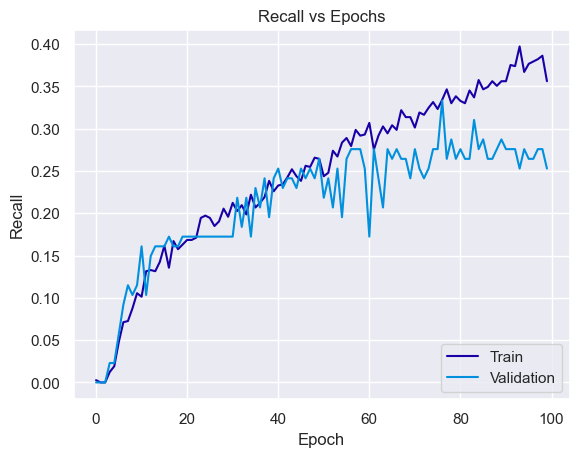

In [ ]:
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('Recall vs Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:**

- The training recall score is fluctuating but overall it is increasing with the increase in the epochs.
- The validation recall is constant between ~50 to 100 epochs and it is fluctuating a bit post 50 epochs.
- The model is not giving good recall score. After 50 epochs, the recall score of the model on the test set is fluctuating around 0.3.

Let's try to increase the model complexity by tuning some of the hyper-parameters mentioned earlier and check if we can improve the model performance. Out of all the options we have, let's try to change the number of hidden layers, the number of neurons in each hidden layer, the activation function in the hidden layer, and the optimizer from **adamax** to **adam**, number of epochs. 

First, we need to clear the previous model's history from the session. In Keras, we need special command to clear the model's history otherwise the previous model history remains in the backend.
Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend

backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(1)

import random
random.seed(1)

tf.random.set_seed(1)

In [ ]:
model_2 = Sequential()
model_2.add(Dense(128, activation='tanh', input_shape=(16,)))
model_2.add(Dropout(0.1))
model_2.add(Dense(64, activation='tanh'))
model_2.add(Dropout(0.1))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
model_2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=[Recall()])
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2176      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12545 (49.00 KB)
Trainable params: 12545 (

In [ ]:
history_2 = model_2.fit(X_train_normalized, 
                    y_train, 
                    validation_split=0.1, 
                    epochs=100, 
                    verbose=0)

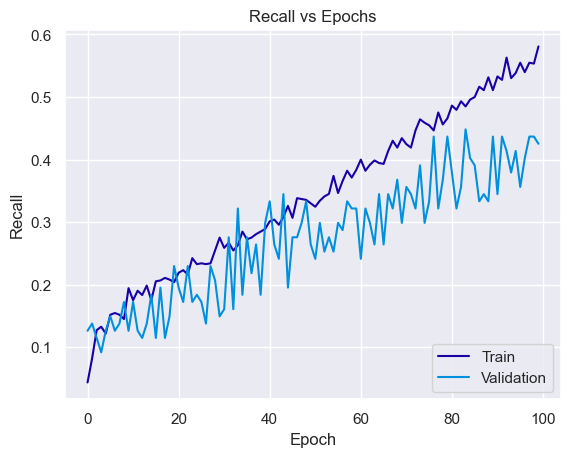

In [ ]:
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('Recall vs Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:** 
- The validation recall is constant around **0.40** after **80** epochs.
- We are able to slightly improve the model performance on the training data and the validation recall score has also increased.

**Let's try to further tune some of the hyper-parameters and check if we can improve the model performance.**

We will use learning_rate = 0.001 for the optimizer in the training process and increase the model complexity by further increasing the number of layers, the number of nodes in each layer, and the epochs.

In [ ]:
# Clearing the backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
np.random.seed(1)

import random
random.seed(1)

tf.random.set_seed(1)

In [ ]:
model_3 = Sequential()
model_3.add(Dense(256, activation='tanh', input_shape=(16,)))
model_3.add(Dropout(0.1))
model_3.add(Dense(128, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(64, activation='tanh'))
model_3.add(Dropout(0.1))
model_3.add(Dense(32, activation='tanh'))
model_3.add(Dense(1, activation='sigmoid'))

In [ ]:
model_3.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[Recall()])
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               4352      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [ ]:
history_3 = model_3.fit(X_train_normalized, 
                    y_train, 
                    validation_split=0.1, 
                    epochs=120,
                    verbose=0)

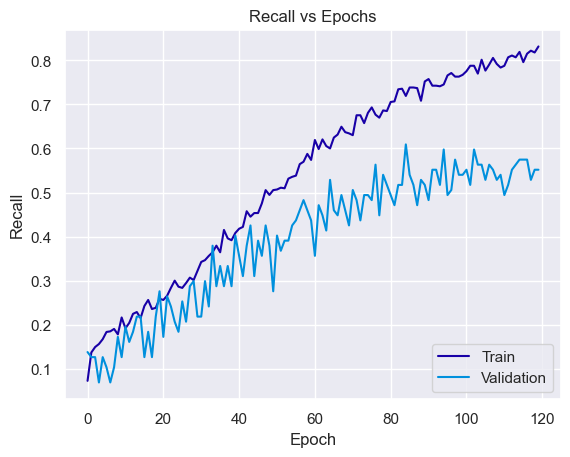

In [ ]:
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('Recall vs Epochs')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

**Observations:**

- This model has better performance on training data as well as on test data. The validation recall is constant between ~80 to 120 epochs and it is fluctuating a bit around 0.5 post 80 epochs.


### **Model evaluation on the test data**

In [ ]:
model_3.evaluate(X_test_normalized, y_test, verbose = 0)
test_pred = np.round(model_3.predict(X_test_normalized))

56/56 [==============================] - 0s 4ms/step


The test accuracy is also coming out to be 95% which implies that our model is able to replicate the performance from the train and validation data on the test (unseen) data.

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1416
           1       0.94      0.55      0.69       372

    accuracy                           0.90      1788
   macro avg       0.92      0.77      0.82      1788
weighted avg       0.90      0.90      0.89      1788



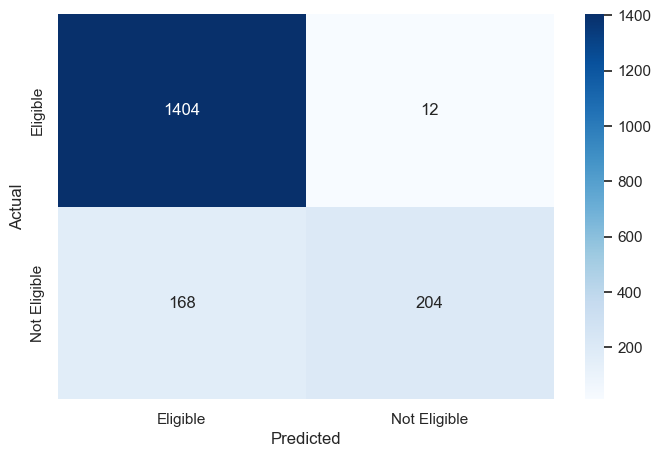

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, test_pred))
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, fmt='.0f',xticklabels=['Eligible', 'Not Eligible'], yticklabels=['Eligible', 'Not Eligible'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Observations:**

- The confusion matrix shows that the model is giving a very high precision score 0.94, but its recall score is only 0.55 which is lower than 0.79 given by the Random Forest Tuned Model. The Neural Network Model are not doing better than the Random Forest Model.